# Wellcome to BestShoes

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
import numpy as np 
import re
import time

In [2]:
#--->Load Html Document from www.Asos.com
def load_soup_object(html_Doc):
    soup_obj = BeautifulSoup(html_Doc.text ,'html.parser')
    return soup_obj

# Extract Data From Website - Crawling

In [3]:
def ExtractInfo_FromSite(link, respone, agent, numberCatalog , Gender, IsfirstColor):
    Shoes_Item = load_soup_object(respone)      #BeautifulSoup
    
    ProductKey , Price = "" , 0
    Name , Color , Commpersion , Type , Brand = "" , "" , "" , "" , ""
    Reviews, GlobalRank , RankSize , RankComfort ,RankQuality = 0 ,0,0,0 ,0
    MaterialSoleRubber , MaterialSolePolyester , MaterialSoleTextile ,MaterialSoleThermoplasticPolyurethane , MaterialSoleOther, MaterialSoleLeather= 0,0,0,0,0,0
    MaterialUpperRubber , MaterialUpperPolyester , MaterialUpperTextile , MaterialUpperThermoplasticPolyurethane, MaterialUpperOther , MaterialUpperLeather =0, 0,0,0,0,0
    templink = []
    
    
    driver = webdriver.Chrome("C:\Program Files (x86)\Google\chromedriver.exe")   #->>>Seleinum
    driver.implicitly_wait(10)
    driver.get(link)
    try:
        GlobalRank_Item = WebDriverWait(driver, 30).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR,'.FPW6c .X3LJZ .I21qs')))
    except:
        GlobalRank_Item = []
    Name_Item = driver.find_elements(By.CSS_SELECTOR, "#pdp-react-critical-app .jcdpl")
    Price_Item = driver.find_elements(By.CSS_SELECTOR,'.MwTOW')
    Color_Item = driver.find_elements(By.CSS_SELECTOR,'.aKxaq')
    Rank_Item = driver.find_elements(By.CSS_SELECTOR,'.cnock .eJLtp')
    Reviews_Item = driver.find_elements(By.CSS_SELECTOR,".FPW6c .X3LJZ div")

    #--->Other link for other colors
    ColorList_other_ItemLinks = driver.find_elements(By.CSS_SELECTOR,"li .PSk4r")
    for x in ColorList_other_ItemLinks:
        templink.append(x.get_attribute('href'))
    for name in Name_Item:
        Name = name.text
    for color in Color_Item:
        Color=color.text 
    for price in Price_Item:
        if price.text.find(' ')>=0:
            if price.text.count(' ') == 1:
                Price=price.text[:price.text.index(' ')]
            else:
                Price=price.text[price.text.find(' ')+1:price.text.rindex(' ')]
    for rank in GlobalRank_Item:
        GlobalRank = rank.text
    if len(Reviews_Item) != 0:
        Reviews = Reviews_Item[3].text[1:-1]
    i=0
    for rank in Rank_Item:
        style = rank.value_of_css_property('left')
        left_value = style.replace("px", "")
        if i==0:
            RankSize = left_value
        if i ==1:
            RankComfort = left_value
        if i ==2:
            RankQuality = left_value
        i+=1
    driver.close()
    
    #Using With BeaotifulSoup
    Productkey_Item = Shoes_Item.find_all("p", class_="Jk9Oz") 
    Type_Item = Shoes_Item.select("#productDescriptionDetails .F_yfF")
    Brand_Item = Shoes_Item.select(".accordion-item-module_contentWrapper__h3KoR .F_yfF a")
    Details_Item = Shoes_Item.select("#productDescriptionDetails .F_yfF li")
    Compersion = Shoes_Item.select("#productDescriptionAboutMe .accordion-item-module_content__2cDKX .F_yfF")
    upper, sole = "" , ""
    for com in Compersion:
        compersion = com.get_text().replace(' ', '') #delete space
        if compersion.find("Sole:")>= 0 and compersion.find("Upper:")>= 0:
            sole = compersion[compersion.index("Sole:"):compersion.index("Upper:")]
            upper = compersion[compersion.index("Upper:"):]
        elif compersion.find("Sole:")>= 0:
            sole = compersion[compersion.index("Sole:"):]
        elif compersion.find("Upper:")>= 0:
            upper = compersion[compersion.index("Upper:"):]
        numberSole = re.findall(r'\d+', sole)
        numberUpper  =  re.findall(r'\d+', upper)
        sum=0
        for x in numberSole:
            if "Textile" == sole[sole.find(x)+len(x)+1:sole.find(x)+len(x)+7+1]:
                sole = sole[sole.find("Textile"):]
                MaterialSoleTextile = x
            elif "Rubber" == sole[sole.find(x)+len(x)+1:sole.find(x)+len(x)+6+1]:
                sole = sole[sole.find("Rubber"):]
                MaterialSoleRubber = x
            elif "Polyester" == sole[sole.find(x)+len(x)+1:sole.find(x)+len(x)+9+1]:
                sole = sole[sole.find("Polyester"):]
                MaterialSoleTextile = x
            elif "ThermoplasticPolyurethane" == sole[sole.find(x)+len(x)+1:sole.find(x)+len(x)+25+1]:
                sole = sole[sole.find("ThermoplasticPolyurethane"):]
                MaterialSoleThermoplasticPolyurethane = x
            elif "Leather" == sole[sole.find(x)+len(x)+1:sole.find(x)+len(x)+7+1]:
                sole = sole[sole.find("Leather"):]
                MaterialSoleLeather = x
            else:
                sole = sole[sole.find(x)+len(x)+1:]
                sum += int(x)
                MaterialSoleOther = x
        sum =0
        for x in numberUpper:
            if "Textile" == upper[upper.find(x)+len(x)+1:upper.find(x)+len(x)+7+1]:
                upper = upper[upper.find("Textile"):]
                MaterialUpperTextile = x
            elif "Rubber" == upper[upper.find(x)+len(x)+1:upper.find(x)+len(x)+6+1]:
                upper = upper[upper.find("Rubber"):]
                MaterialUpperRubber = x
            elif "Polyester" == upper[upper.find(x)+len(x)+1:upper.find(x)+len(x)+9+1]:
                upper = upper[upper.find("Polyester"):]
                MaterialUpperPolyester = x
            elif "ThermoplasticPolyurethane" == upper[upper.find(x)+len(x)+1:upper.find(x)+len(x)+25+1]:
                upper = upper[upper.find("ThermoplasticPolyurethane"):]
                MaterialUpperThermoplasticPolyurethane = x
            elif "Leather" == upper[upper.find(x)+len(x)+1:upper.find(x)+len(x)+7+1]:
                upper = upper[upper.find("Leather"):]
                MaterialUpperLeather = x
            else:
                upper = upper[upper.find(x)+len(x)+1:]
                sum += int(x)
                MaterialUpperOther = x   
    
    
    for product_key in Productkey_Item:
        if(len(product_key.get_text())>=0):
            ProductKey = product_key.get_text()[len('Product Code: '):]
    description =""
    for i in range(len(Details_Item)):
        if i<len(Details_Item)-1:
            description += Details_Item[i].get_text()+ " , "
        else:
            description += Details_Item[i].get_text()
    Data['Details'].append(description)
    for brand in Brand_Item:
        if Brand_Item != None:
            Brand=brand.text
    for typ in Type_Item:
        Type = typ.get_text()[:typ.get_text().index(" ")]

    #Add to Data
    Data['ProductKey'].append(ProductKey)
    Data['Price'].append(Price)
    Data['Name'].append(Name)
    Data['Color'].append(Color)
    Data['Brand'].append(Brand)
    Data['NumberCatalog'].append(numberCatalog)
    Data['Gender'].append(Gender)
    Data['Type'].append(Type)
    Data['Reviews'].append(Reviews)
    Data['GlobalRank'].append(GlobalRank)
    Data['RankSize'].append(RankSize)
    Data['RankComfort'].append(RankComfort)
    Data['RankQuality'].append(RankQuality)
    Data['MaterialSoleRubber'].append(MaterialSoleRubber)
    Data['MaterialSolePolyester'].append(MaterialSolePolyester)
    Data['MaterialSoleTextile'].append(MaterialSoleTextile)
    Data['MaterialSoleThermoplasticPolyurethane'].append(MaterialSoleThermoplasticPolyurethane)
    Data['MaterialSoleLeather'].append(MaterialSoleLeather)
    Data['MaterialSoleOther'].append(MaterialSoleOther)
    Data['MaterialUpperRubber'].append(MaterialUpperRubber)
    Data['MaterialUpperPolyester'].append(MaterialUpperPolyester)
    Data['MaterialUpperTextile'].append(MaterialUpperTextile)
    Data['MaterialUpperThermoplasticPolyurethane'].append(MaterialUpperThermoplasticPolyurethane)
    Data['MaterialUpperLeather'].append(MaterialUpperLeather)
    Data['MaterialUpperOther'].append(MaterialUpperOther)
    print("Adding Product:"+ProductKey)
    
    #----> Get All The Other Page Of Shoes Which is in diffrent Price And color
    if IsfirstColor == True:
        for url in templink:
            if url != None:  #---->The correct link is usally None
                respone = requests.get(url, headers=agent , timeout=2)
                if respone.status_code == 200:
                    ExtractInfo_FromSite(url , respone ,agent, numberCatalog ,Gender, False)
    #return True #if there is Other Color ot this type, else return false

In [ ]:
#UpdateData Using Selenium
#This Function deal With the Main Menu in www.Asos.com
def UpdateData(url,NumberCatalog ,Gender, agent):
    try:
        #Create Connection to Asos Server
        respone = requests.get(url, headers=agent , timeout=2)
        if respone.status_code == 200:
            print ("Respone Is ok , The page Exist")
            
            LinkListAllProduct = []
            isNextPage = True
            NumPage = 1
            number_Catalog = NumberCatalog
            driver = webdriver.Chrome("C:\Program Files (x86)\Google\chromedriver.exe")   #->>>Seleinum
            driver.implicitly_wait(10)
            driver.get(url)
            while isNextPage:
                ItemLinkNextPage = driver.find_elements(By.XPATH, "//section[@data-auto-id="+str(NumPage)+"]//a[@class='productLink_KM4PI']")
                for link in ItemLinkNextPage:
                    LinkListAllProduct.append(link.get_attribute('href'))
                NextPage = driver.find_elements(By.CSS_SELECTOR,".loadButton_i3U2b")
                if NextPage:
                    NextPage[0].click()#Open other section of products
                    NumPage +=1
                else:
                    isNextPage = False
            driver.close()
            print("Total Product By Gender:"+str(Gender)+" "+str(len(LinkListAllProduct)))
            
            #---->Extract all the Product
            print ("Start To Extract")
            for link in LinkListAllProduct:
                respone = requests.get(link, headers=agent , timeout=2)
                if respone.status_code == 200:
                    try:
                        ExtractInfo_FromSite(link , respone ,agent, number_Catalog ,Gender, True)
                        number_Catalog+=1
                    except:
                        print("Extract Not Working")
            return number_Catalog
        else:
            print ("Response Code: {0}".format(respone.status_code))
            return number_Catalog
    
    except Exception as e:
            print("Somting goes worng")
            print(str(e))
            return -1

In [4]:
#--->Create The DataFrame
def CreateDataFrame(Data):
    df = pd.DataFrame(Data)
    print(df.info())
    return df

In [5]:
#--->Save The DataFrame in Csv Doc
def SaveToCsv(df,path):
    if not df.empty:
        df.to_csv(path)
        print("\n-->Sucssesful Save DataFrame By Crawling\n")
    else:
        print("\n-->Crawling Maybe Not Succses\n")

In [ ]:
#---->#Info for crawling www.asos.com

#Dictionry Object - With List Of Data
Data = {'ProductKey': [] ,'Name':[] ,'NumberCatalog':[] ,"Gender":[] ,'Brand': [] , 'Price' : [] ,'Color' : [] , 'Details': []  , 'Type' : [] , 'MaterialSoleRubber' : [] ,'MaterialSolePolyester' : [], 'MaterialSoleTextile' : [] ,"MaterialSoleThermoplasticPolyurethane":[] , "MaterialSoleOther": [], 'MaterialUpperRubber' : [] ,'MaterialUpperPolyester' : [], 'MaterialUpperTextile' : [] ,"MaterialUpperThermoplasticPolyurethane": [], 'MaterialUpperOther':[] , 'GlobalRank' : [] , "Reviews":[] , "RankSize":[] ,"RankComfort":[],"RankQuality":[] }
csvPath = "./CSV_Document/AsosData.csv"
NumberCatalog =1 

urlWomen = "https://www.asos.com/women/shoes/cat/?cid=4172"               #--->Women url
urlMen= "https://www.asos.com/men/shoes-boots-trainers/cat/?cid=4209"     #--->Men url
agent = {"User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'}

number_Catalog = UpdateData(urlWomen ,NumberCatalog, "Women", agent)
number_Catalog = UpdateData(urlMen , number_Catalog, "Men", agent)

df = CreateDataFrame(Data)
SaveToCsv(df,csvPath)
df.info()

# Optimize DataFrame

In [6]:
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#---->Load DataFrame From CSV
def LoadDataFrame(path):
    df = pd.read_csv(path)
    return df

In [8]:
#--->Print Shape DataFrame
def ShapeOfDataFrame(df):
    print("Shape Of DataFrame:\nRows:{0} , Cols:{1}\n".format(df.shape[0], df.shape[1]))

In [9]:
path = "./CSV_Document/AsosData.csv"
df = LoadDataFrame(path)

#----->Print Sum info About The DataFrame
ShapeOfDataFrame(df)
df.info()

Shape Of DataFrame:
Rows:8930 , Cols:26

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8930 entries, 0 to 8929
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ProductKey                              8930 non-null   int64  
 1   Name                                    8924 non-null   object 
 2   NumberCatalog                           8930 non-null   int64  
 3   Gender                                  8930 non-null   object 
 4   Brand                                   8840 non-null   object 
 5   Price                                   8912 non-null   object 
 6   Color                                   8906 non-null   object 
 7   Details                                 8919 non-null   object 
 8   Type                                    8930 non-null   object 
 9   MaterialSoleRubber                      8930 non-null   int64  
 10  MaterialSolePolyest

In [10]:
#--->Describe Coloums
df[["Gender","Brand","Type","Color"]].describe(include="all")

,Gender,Brand,Type,Color
count,8930,8840,8930,8906
unique,2,117,25,708
top,Women,ASOS DESIGN,Shoes,BLACK
freq,5561,2045,3085,1552


# Information Of Dataframe

# Deal With The DataFrame

In [11]:
#---->Clean Missing Elements
def CleanMissingElements(df):
    print("--->Delete {0} Row With NaN Values in DataFrame".format(df.isnull().sum().sum()))
    df.dropna(how="any", axis=0 ,inplace= True)     #---<Delete row if some elemnts is NAN

In [12]:
#--->Delete row that Have the Same Code
def RemoveDuplicate(df):
    rows = len(df.index)
    df.drop_duplicates(subset=["ProductKey"], keep="first", inplace = True)
    print("--->There was {0} duplicates That Removed".format(rows-df.shape[0]))
    df.reset_index(inplace=True)

In [13]:
#Fix string to LowerCase and convert Object Column to 'category'
def FixValueColoums(df):
    #ImproveValues
    for x in df.index:
        if isinstance(df.loc[x,"Details"],str):
            df.loc[x,"Details"] = df.loc[x,"Details"].count(",")+1
        if isinstance(df.loc[x,"Reviews"], str): 
            df.loc[x,"Reviews"] = re.findall(r"\d+",df.loc[x,"Reviews"])[0]
        df.loc[x,"Color"] = str(df.loc[x,"Color"]).lower()
        df.loc[x,"Brand"] = str(df.loc[x,"Brand"]).lower()
        df.loc[x,"Type"] =str(df.loc[x,"Type"]).lower()
        if df.loc[x,"Name"].find(" in")>=0:
            df.loc[x,"Name"] = df.loc[x,"Name"][:df.loc[x,"Name"].find(" in")]
        num =""
        for char in str(df.loc[x,"Price"]):
            if char.isdigit() or char =='.':
                num+=char
        df.loc[x,"Price"] = num
    
    #Reducing Duplication Values by Pattern in String Object
    category = df.Type.unique()
    for x in category:
        for index in df.index:
             if df.loc[index,"Type"].find(x) >= 0:
                    df.loc[index,"Type"] = x
    category = df.Brand.unique()
    for x in category:
        for index in df.index:
             if df.loc[index,"Brand"].find(x) >= 0:
                    df.loc[index,"Brand"] = x
    
    #Convert Coloums To Different Type
    df["Details"] = pd.to_numeric(df["Details"],errors="raise")
    df["Reviews"] = pd.to_numeric(df["Reviews"],errors="raise")
    df["Price"] = pd.to_numeric(df["Price"],errors="raise")
    
    #Delete element with '0' value
    df = df[df["GlobalRank"]>0]
    df = df[df['Price'] > 0]
    #Convert Coloums To Different Type
    df = df.astype({'Gender':'category' , 'Brand':'category' , 'Type':'category' , 'Color':'category'})
    df["GlobalRank"] = pd.cut(df["GlobalRank"] ,bins=5 ,labels =[1 , 2 , 3 , 4 , 5]) 
    return df

In [14]:
Data = {'ProductKey': [] ,'Name':[] ,'NumberCatalog':[] ,"Gender":[] ,'Brand': [] , 'Price' : [] ,'Color' : [] , 'Details': []  , 'Type' : [] , 'MaterialSoleRubber' : [] ,'MaterialSolePolyester' : [], 'MaterialSoleTextile' : [] ,"MaterialSoleThermoplasticPolyurethane":[] , "MaterialSoleOther": [], 'MaterialUpperRubber' : [] ,'MaterialUpperPolyester' : [], 'MaterialUpperTextile' : [] ,"MaterialUpperThermoplasticPolyurethane": [], 'MaterialUpperOther':[] , 'GlobalRank' : [] , "Reviews":[] , "RankSize":[] ,"RankComfort":[],"RankQuality":[] }
path = "./CSV_Document/AsosDataOptimize/AsosDataFix.csv"

#Optimize The DataFrame
CleanMissingElements(df)
RemoveDuplicate(df)
df = FixValueColoums(df)

#Save the Fix DataFrame
SaveToCsv(df,path)
df.info()

--->Delete 149 Row With NaN Values in DataFrame
--->There was 4395 duplicates That Removed

-->Sucssesful Save DataFrame By Crawling

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 0 to 4392
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   index                                   1819 non-null   int64   
 1   ProductKey                              1819 non-null   int64   
 2   Name                                    1819 non-null   object  
 3   NumberCatalog                           1819 non-null   int64   
 4   Gender                                  1819 non-null   category
 5   Brand                                   1819 non-null   category
 6   Price                                   1819 non-null   float64 
 7   Color                                   1819 non-null   category
 8   Details                                 1819 non-null 

# Fix Outliers

In [15]:
#--->Fix with the Outliers of Price Columns
def FixOutliers(df):
    q25 = df["Price"].quantile(0.25)
    q75 = df["Price"].quantile(0.75)

    # Calculate the IQR
    iqr = q75 - q25
    # Identify values that are more than 1.5 times the IQR below the 25th percentile or above the 75th percentile
    outliers = df[(df["Price"] > q25 - 1.5*iqr) & (df["Price"] < q75 + 1.5*iqr)]
    return outliers

[Text(0.5, 1.0, 'Before The Fix Outliers')]

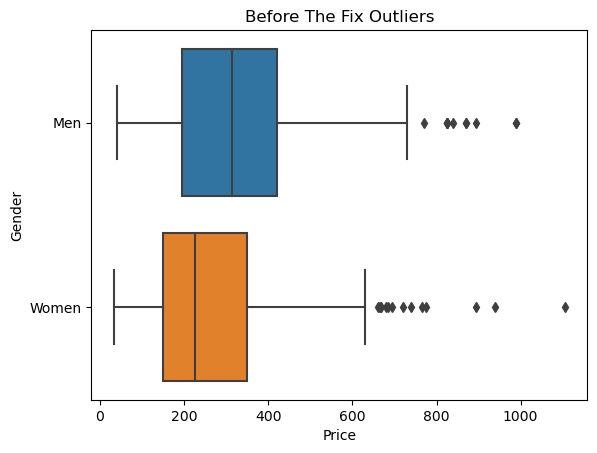

In [16]:
#--->Illustration the Outliers of Price
sns.boxplot(data=df , x="Price" , y="Gender").set(title="Before The Fix Outliers")


-->Sucssesful Save DataFrame By Crawling

--->Outliers Fixed


[Text(0.5, 1.0, 'After The Fix Outliers')]

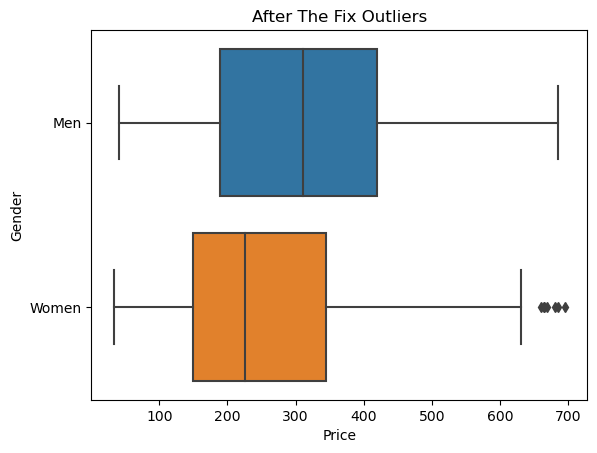

In [17]:
df = FixOutliers(df.copy())
SaveToCsv(df,path)
print("--->Outliers Fixed")
sns.boxplot(data=df , x="Price" , y="Gender").set(title="After The Fix Outliers")

# Make Category Material

In [18]:
#convert Object Column to 'category'
def MakeCategoryMaterialUpper(df):
    Upper = []
    Sole = []                
    for x in range(len(df.index)):
        sole_text = "" 
        if df.iloc[x]["MaterialSoleRubber"] > 0:
            sole_text += "Rubber "
        if df.iloc[x]["MaterialSolePolyester"] > 0:
            sole_text += "Polyester "
        if df.iloc[x]["MaterialSoleTextile"] > 0:
            sole_text += "Textile "
        if df.iloc[x]["MaterialSoleThermoplasticPolyurethane"]> 0:
            sole_text += "ThermoplasticPolyurethane "
        if df.iloc[x]["MaterialSoleLeather"] > 0:
            sole_text += "Leather"
        if df.iloc[x]["MaterialSoleOther"] == 100:
            sole_text = "Other"
        elif df.iloc[x]["MaterialSoleOther"] > 0:
            sole_text += "Other"
        Sole.append(sole_text)
    for x in range(len(df.index)):
        upper_text = ""
        if df.iloc[x]["MaterialUpperRubber"] > 0:
            upper_text += "Rubber "
        if df.iloc[x]["MaterialUpperPolyester"] > 0:
            upper_text += "Polyester "
        if df.iloc[x]["MaterialUpperTextile"] > 0:
            upper_text += "Textile "
        if df.iloc[x]["MaterialUpperThermoplasticPolyurethane"]> 0:
            upper_text += "ThermoplasticPolyurethane "
        if df.iloc[x]["MaterialUpperLeather"] > 0:
            upper_text += "Leather"
        if df.iloc[x]["MaterialUpperOther"] == 100:
            upper_text = "Other"
        elif df.iloc[x]["MaterialUpperOther"] > 0:
            upper_text += "Other"
        Upper.append(upper_text)
    
    df1 = df[["ProductKey","Name","NumberCatalog","Gender","Brand","Price","Color","Details","Type","GlobalRank","Reviews", "RankSize","RankComfort","RankQuality"]]
    df1.insert(8, "Sole", Sole, True)
    df1.insert(9, "Upper", Upper, True)
    df1 = df1.astype({'Upper':'category' , 'Sole':'category'})
    return df1

In [19]:
path = "./CSV_Document/AsosDataOptimize/AsosDataOptimize.csv"

#Save the Fix DataFrame
df = MakeCategoryMaterialUpper(df.copy())
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)
SaveToCsv(df,path)


-->Sucssesful Save DataFrame By Crawling



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.7+ KB


# EDA

In [21]:
#--->Create A Sersils By Column Name
def one_dim_plot(sr, plot_type, axis, titles):
    sr.plot(kind = plot_type, ax = axis ,title=titles, autopct='%1.1f%%')

In [22]:
#--->Create A Sersils By Column Name
def GetFrequenftElements(df, ColumnName , numFrequenft):
    sr = df[ColumnName].value_counts(ascending=False)[0:numFrequenft].sort_index(ascending = True)
    return sr

In [23]:
def CreatPieGraph(df):
    fig, ax = plt.subplots(1,3, figsize=(20,10))
    one_dim_plot(GetFrequenftElements(df,"Color",10),"pie",ax[0] , "Top 10 Color")
    one_dim_plot(GetFrequenftElements(df,"Brand",10),"pie",ax[1] , "Top 10 Brand")
    one_dim_plot(GetFrequenftElements(df,"Type",10),"pie",ax[2], "Top 10  Type")
    return fig

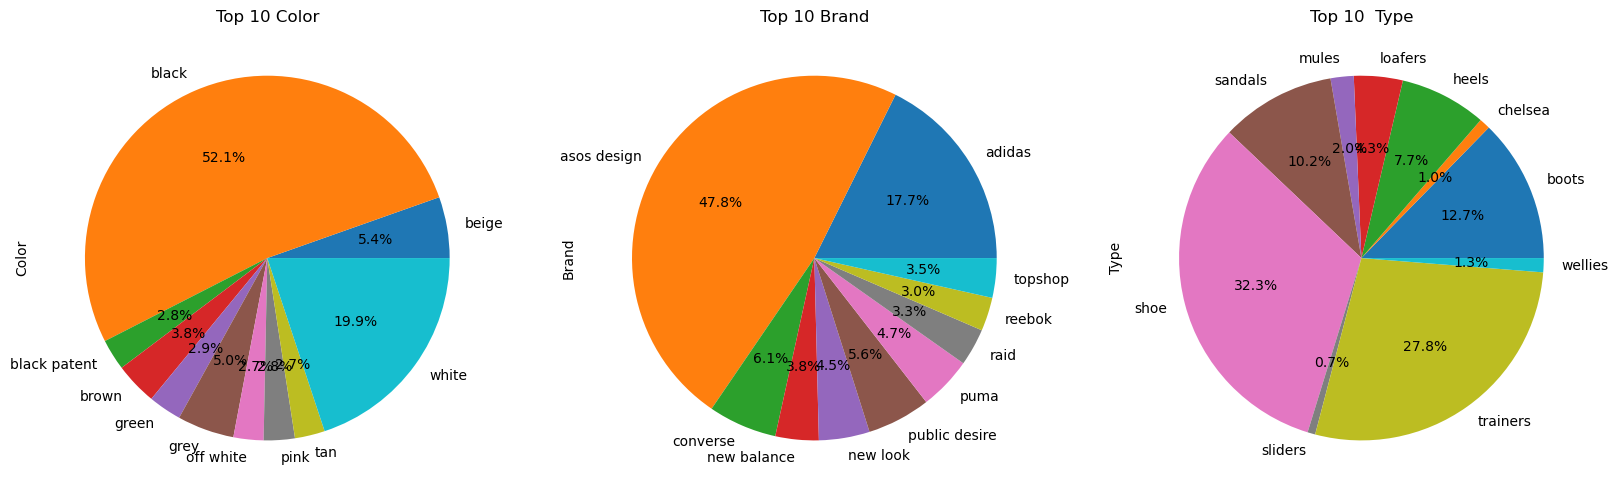

In [24]:
fig = CreatPieGraph(df.copy())

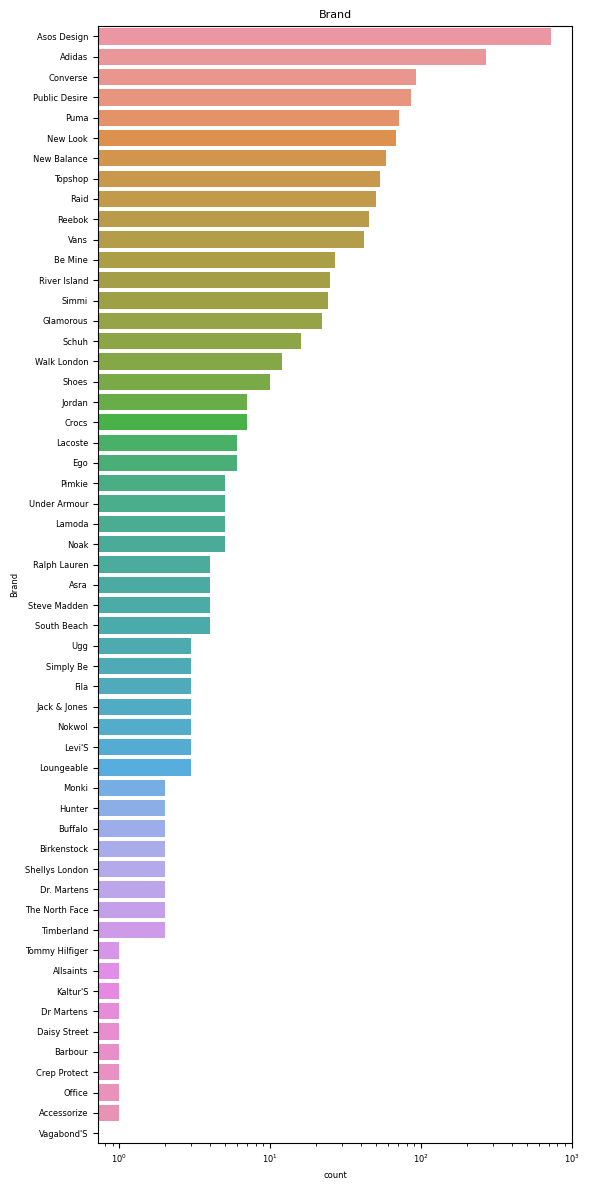

In [25]:
plt.figure(figsize = (6, 12))
Brands = list( map(lambda x: x.title(), df["Brand"].value_counts().keys().tolist()))
ax = sns.countplot(y = "Brand", data = df,  order = df["Brand"].value_counts().index)

ax.set_xscale("log")
ax.axes.set_title("Brand", fontsize = 8)
ax.set_xlabel("count", fontsize = 6)
ax.set_ylabel("Brand", fontsize = 6)
ax.tick_params(labelsize = 6)

ax.set_yticklabels(Brands, rotation = 0, fontsize = 6)
plt.tight_layout()
plt.show()

In [26]:
def one_dim_plot2(ctb , kind , axes, titles):
    ctb.plot(kind="bar" , figsize=(15,12),ax=axes , title=titles)

In [27]:
def CreateCrosstab(df, nameColumn1 , nameColumn2):
    ctb = pd.crosstab(df[nameColumn1] , df[nameColumn2] , normalize ="index")
    return ctb

In [28]:
def CrosstabGraph(df):
    fig, ax = plt.subplots(3,1, figsize=(15,50))
    one_dim_plot2(CreateCrosstab(df,"Type","Gender"),"bar",ax[0] , "Gender vs Type")
    one_dim_plot2(CreateCrosstab(df,"Brand","Gender"),"bar",ax[1] , "Gender vs Brand")
    one_dim_plot2(CreateCrosstab(df,"Details","Gender"),"bar",ax[2] , "Gender vs Count Details")
    fig.tight_layout(pad=2.0)
    return fig

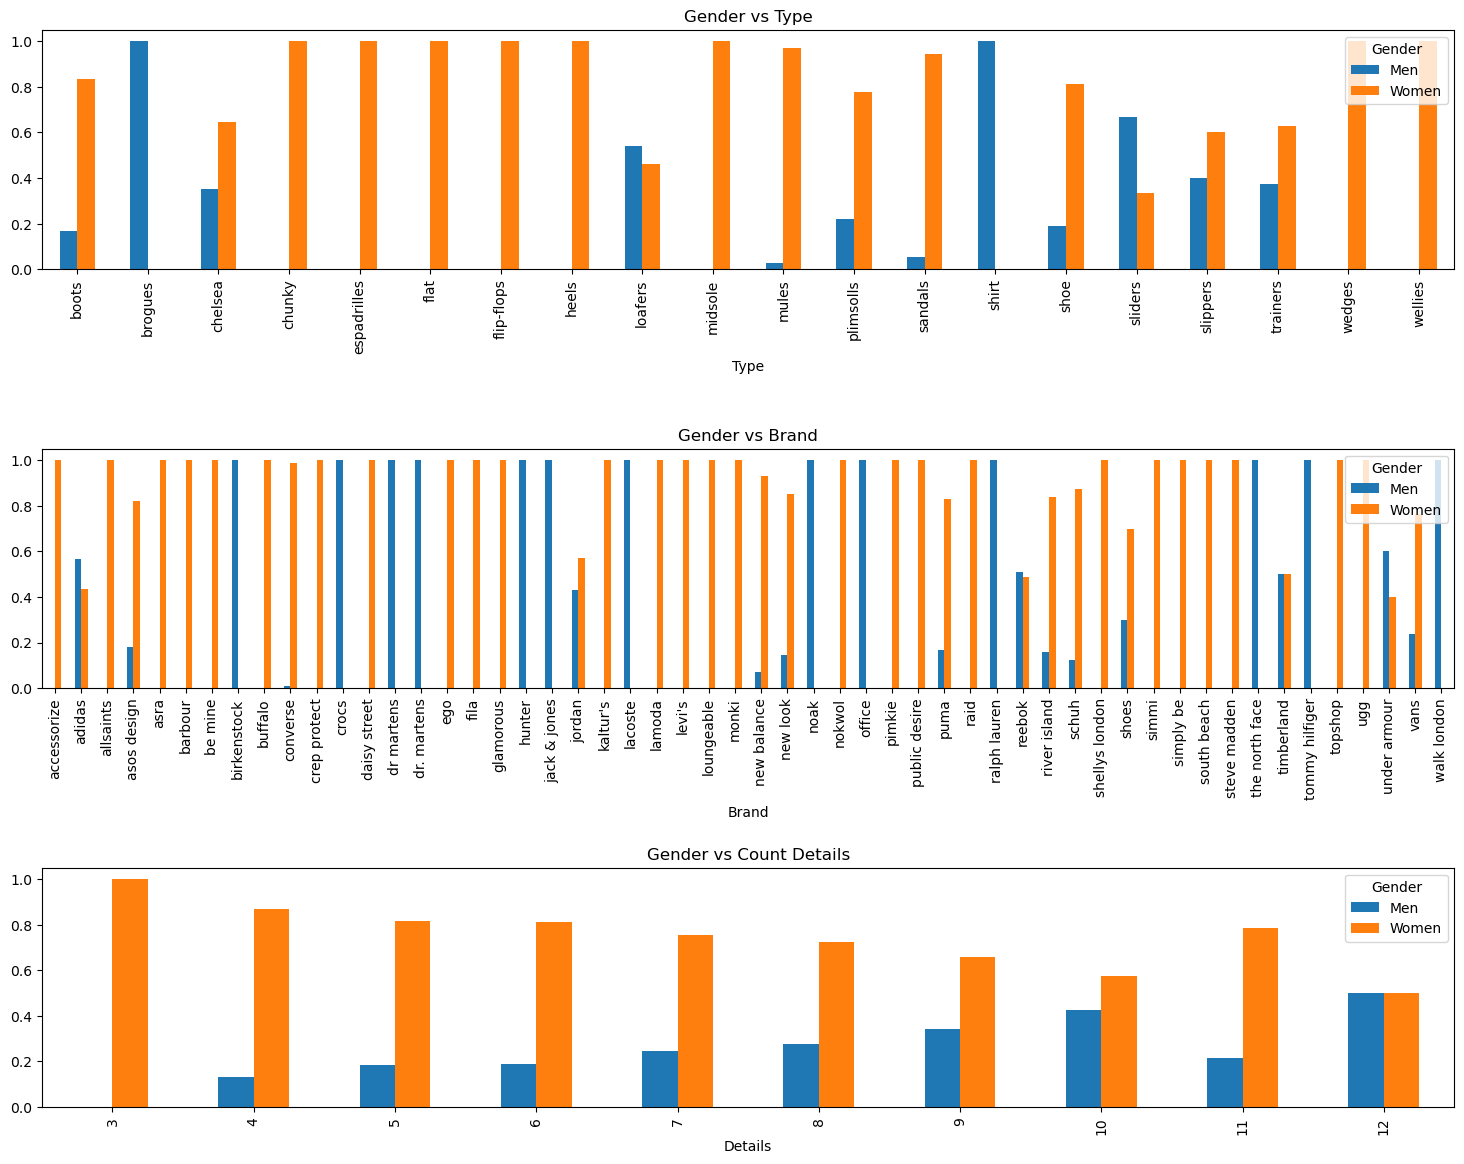

In [29]:
fig = CrosstabGraph(df.copy())

# Destiny Of Price

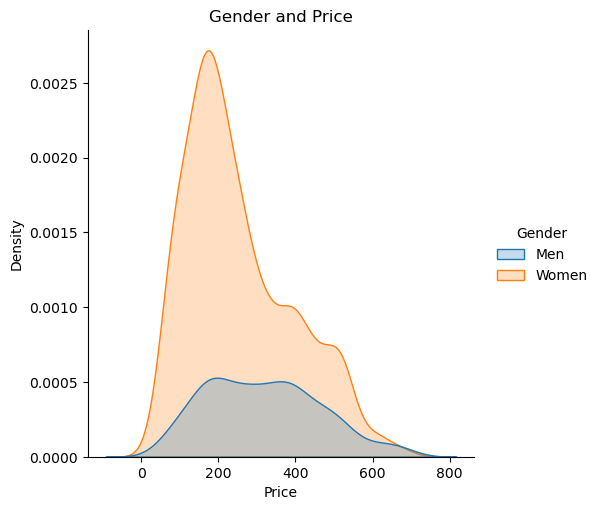

In [30]:
sns.displot(df, x="Price", kind="kde" , hue="Gender",fill=True).set(title="Gender and Price")

# Connection Between Price And Rank

C:\Users\danie\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


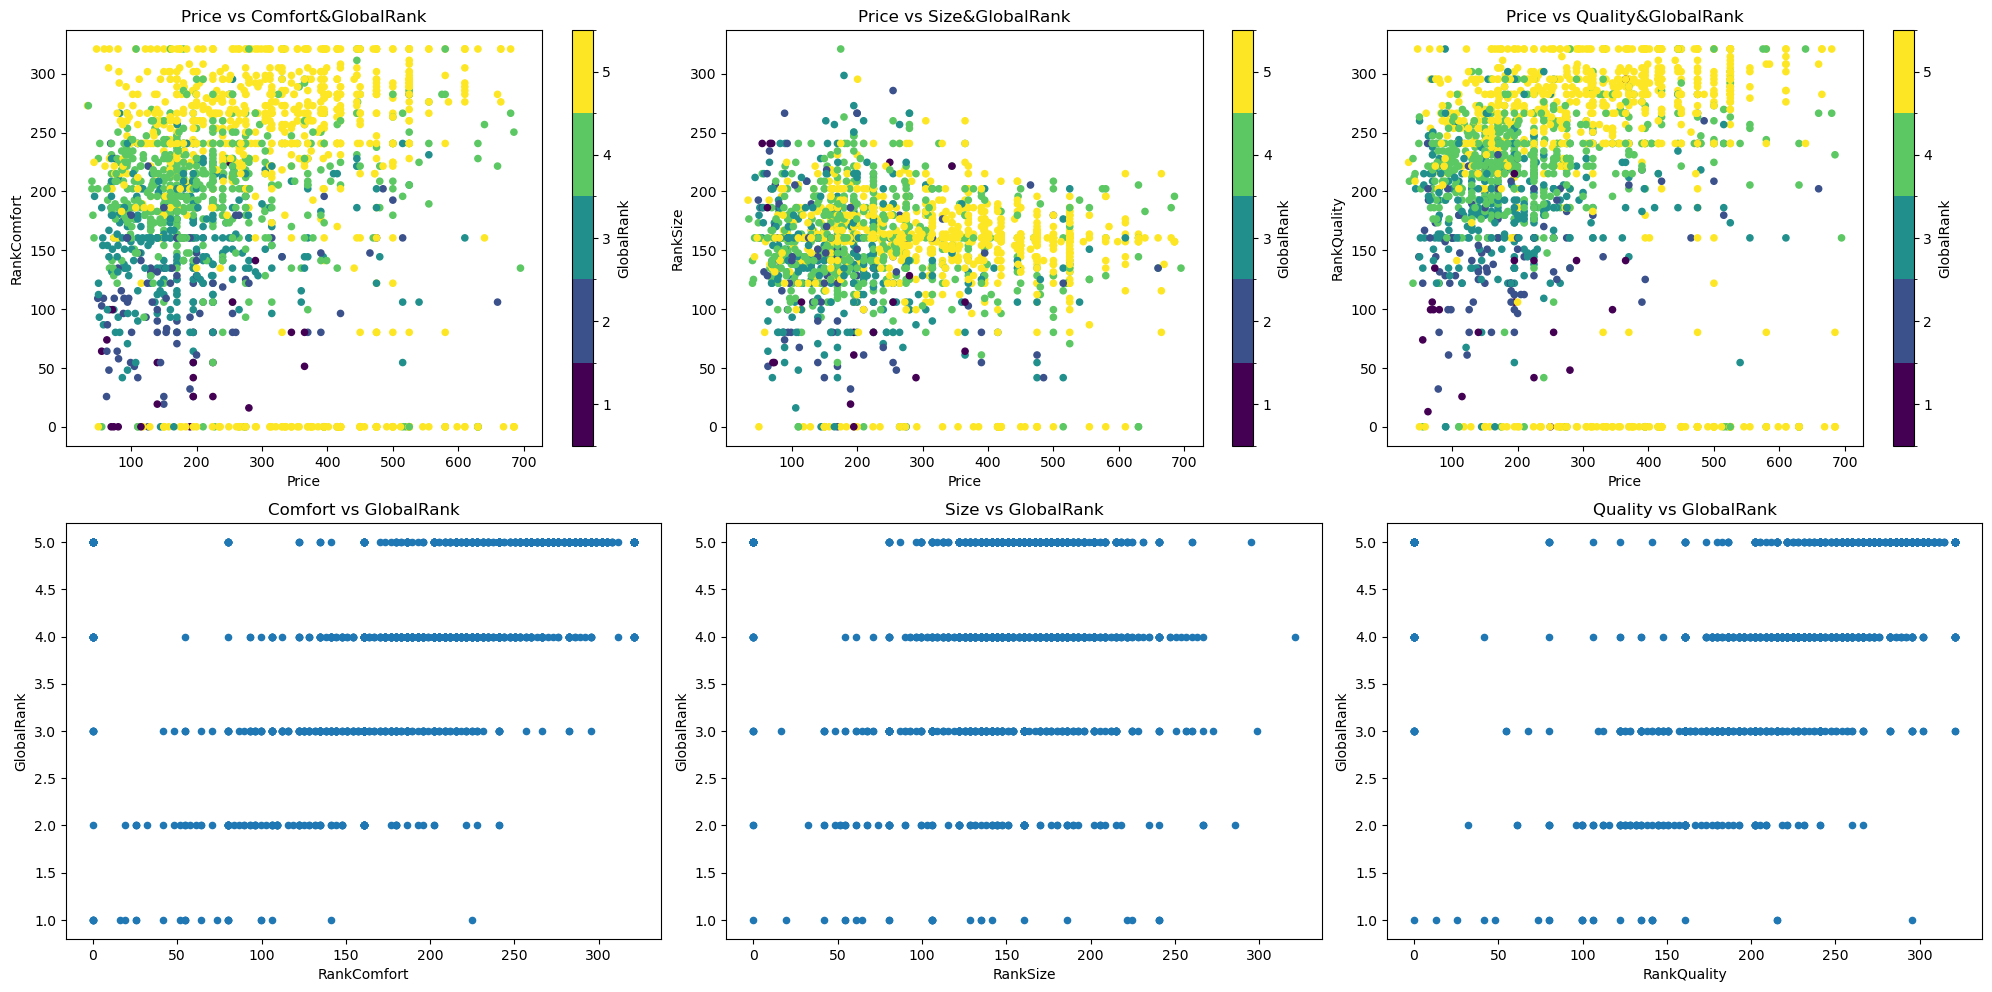

In [31]:
fig , axes = plt.subplots(2,3, figsize=(20,3))
df.plot.scatter(ax=axes[0,0],x="Price" , y="RankComfort",c="GlobalRank", colormap='viridis', title="Price vs Comfort&GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[0,1],x="Price" , y="RankSize",c="GlobalRank", colormap='viridis', title="Price vs Size&GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[0,2],x="Price" , y="RankQuality",c="GlobalRank", colormap='viridis', title="Price vs Quality&GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[1,0],x="RankComfort" , y="GlobalRank", colormap='viridis', title="Comfort vs GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[1,1],x="RankSize" , y="GlobalRank", colormap='viridis', title="Size vs GlobalRank",figsize=(20,10))
df.plot.scatter(ax=axes[1,2],x="RankQuality" , y="GlobalRank", colormap='viridis', title="Quality vs GlobalRank",figsize=(20,10))
fig.tight_layout(pad=1.0)

[Text(0.5, 1.0, 'Price By Count')]

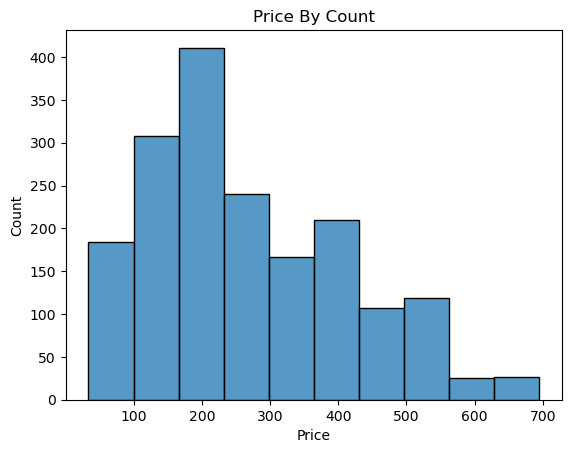

In [32]:
sns.histplot(df, x="Price", bins=10).set(title="Price By Count")

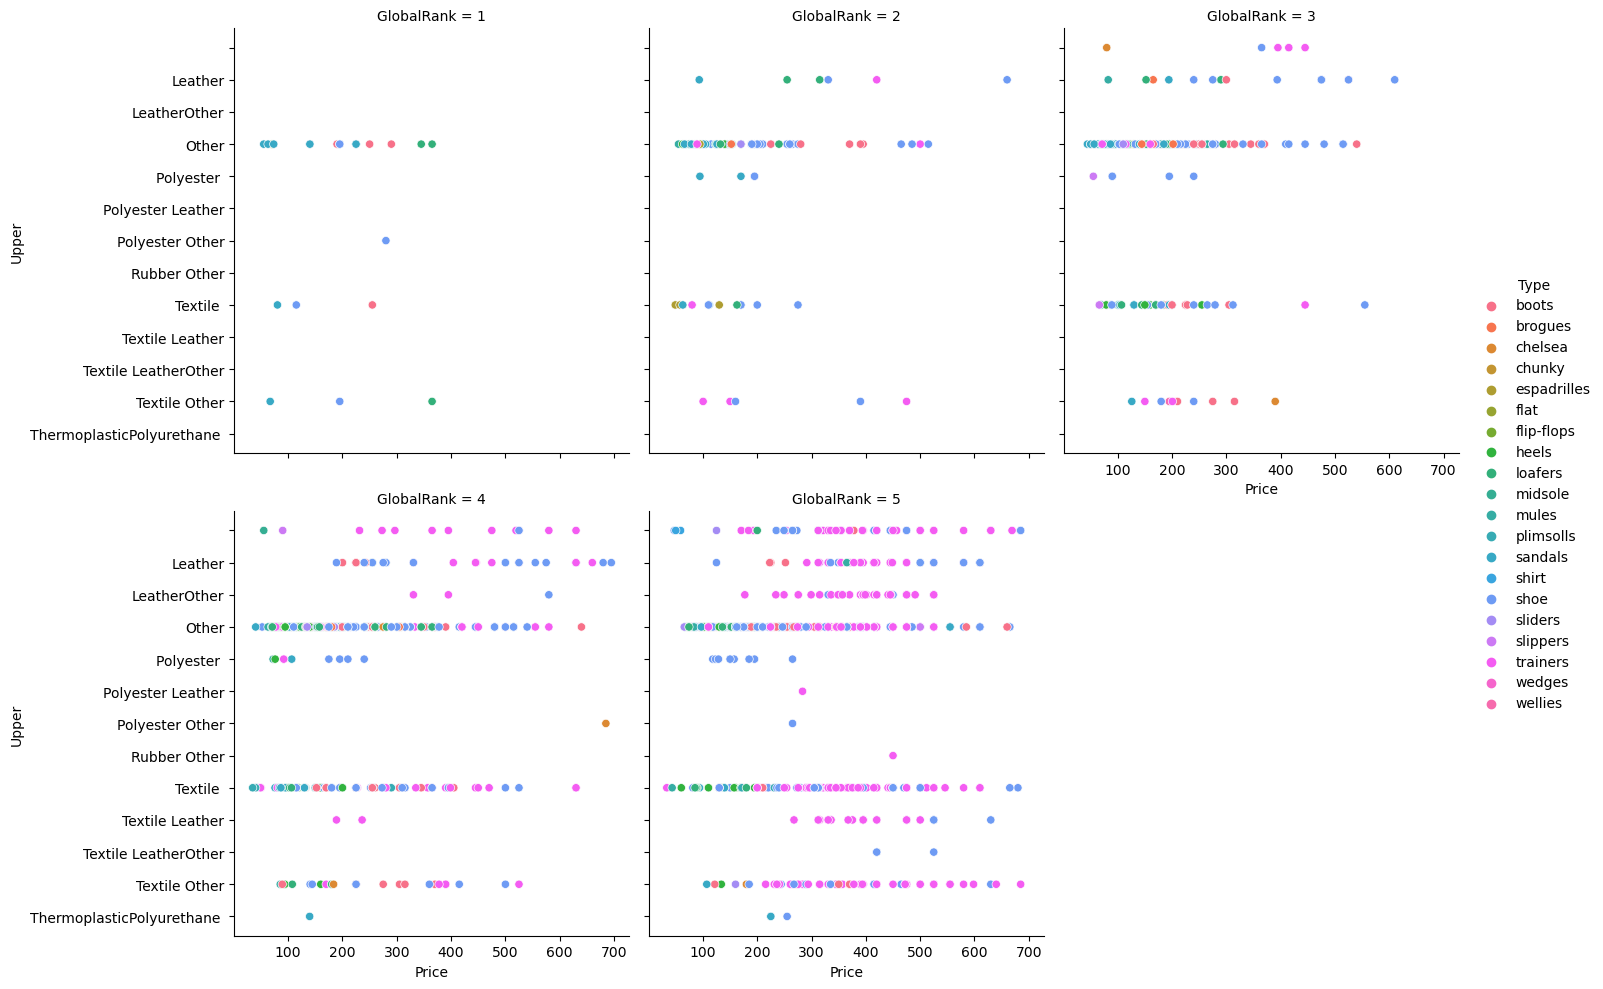

In [33]:
sns.relplot(data=df, x="Price", y="Upper",col="GlobalRank", hue="Type",kind="scatter" ,col_wrap=3 , sizes=(100,30) ,aspect=1)

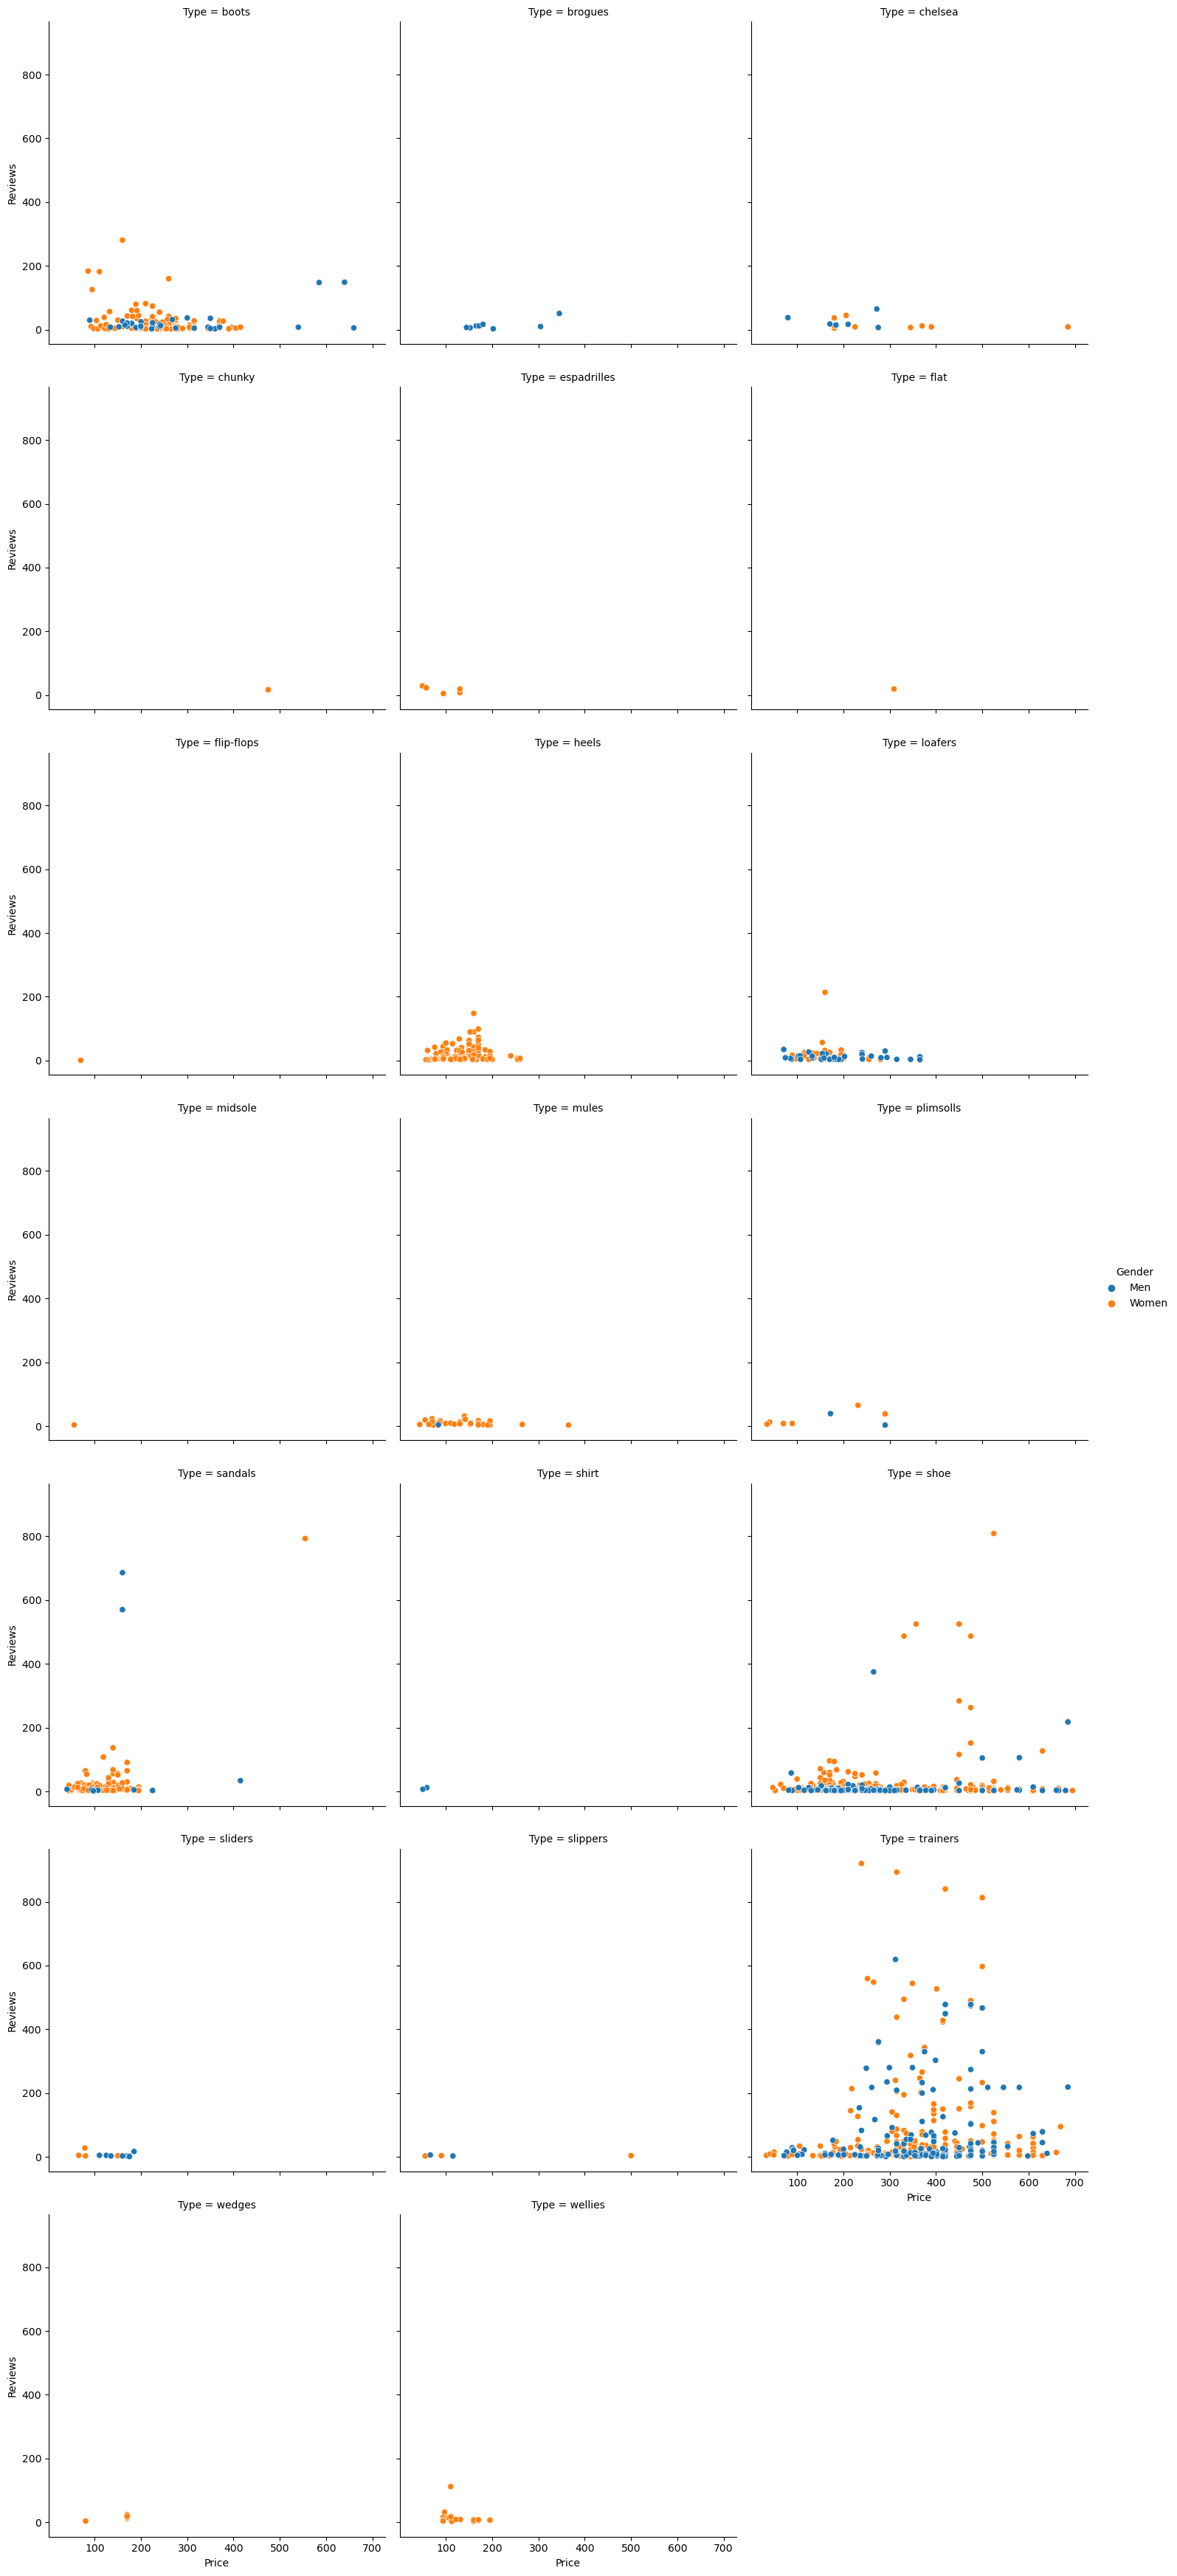

In [34]:
sns.relplot(data=df, x="Price", y="Reviews",col="Type", hue="Gender",kind="scatter" ,col_wrap=3 , sizes=(100,30) ,aspect=1)

# Relationship With Metrial And Price

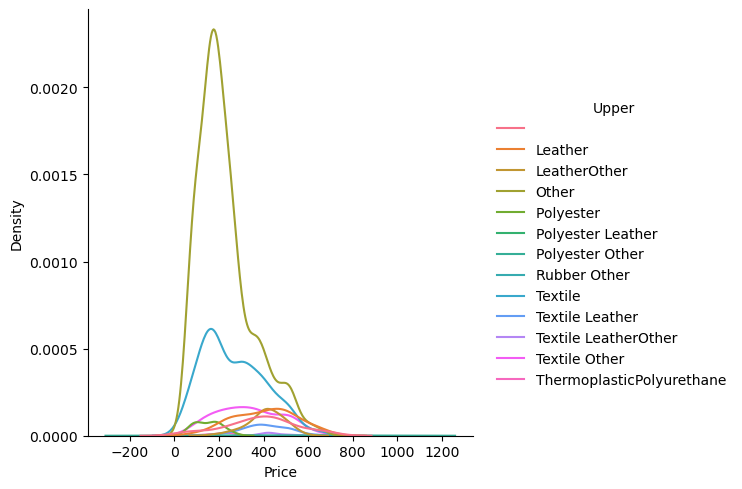

In [35]:
sns.displot(df, x="Price", hue="Upper", kind="kde" , warn_singular=False)

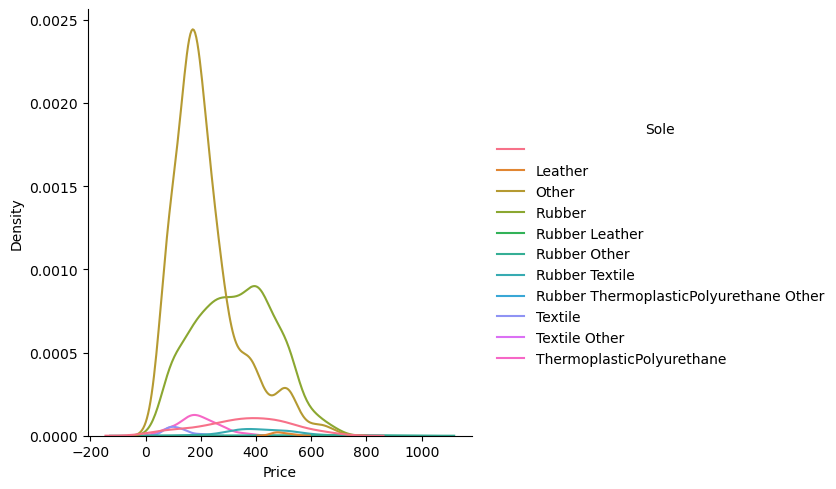

In [36]:
sns.displot(df, x="Price", hue="Sole", kind="kde" , warn_singular=False)

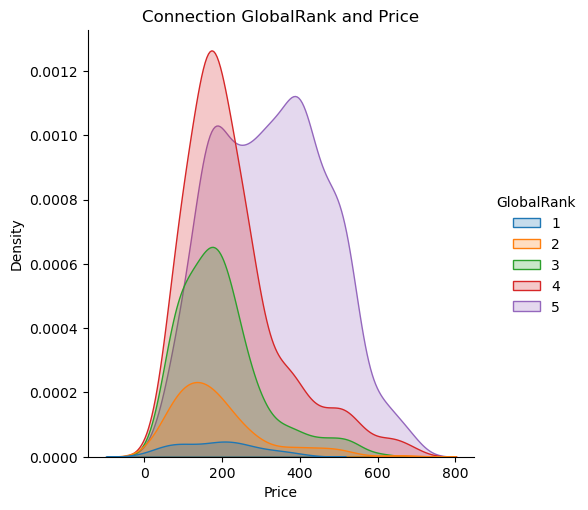

In [37]:
sns.displot(df, x="Price", hue="GlobalRank", kind="kde",fill=True , warn_singular=False).set(title="Connection GlobalRank and Price")

# Example Of Brand

In [38]:
def MakeDataFrameGroup(df , nameColumn , value):
    return df[df[nameColumn] == value]

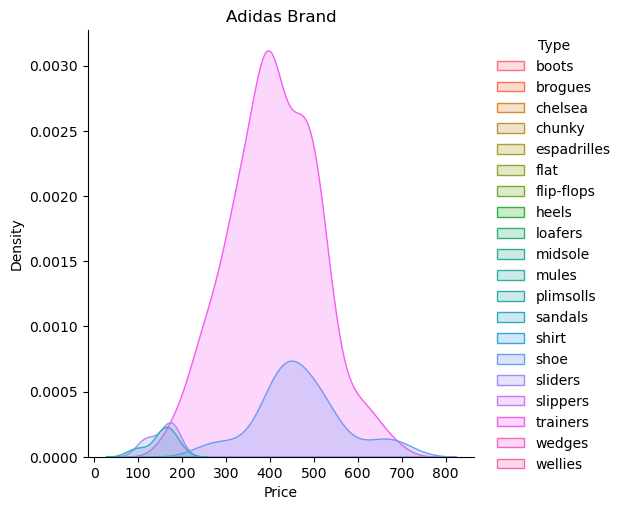

In [39]:
dftemp = MakeDataFrameGroup(df.copy() , "Brand" , "adidas")
sns.displot(dftemp, x="Price", hue="Type", kind="kde", fill=True , warn_singular=False).set(title='Adidas Brand')

# Example Of Color

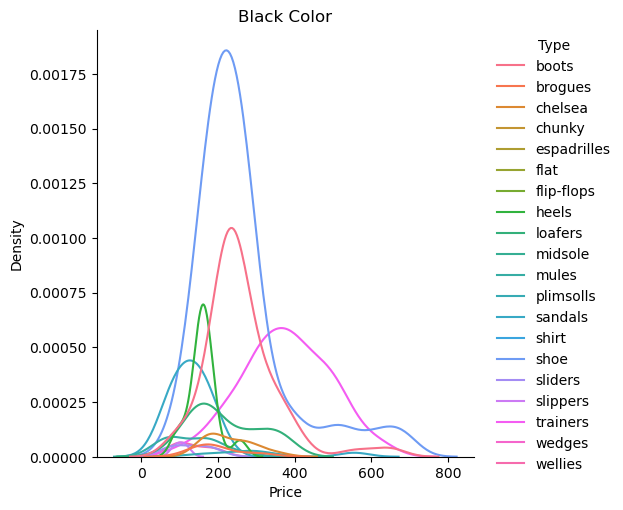

In [40]:
dftemp = MakeDataFrameGroup(df.copy() , "Color" , "black")
sns.displot(dftemp, x="Price", hue="Type", kind="kde", fill=False , warn_singular=False).set(title='Black Color')

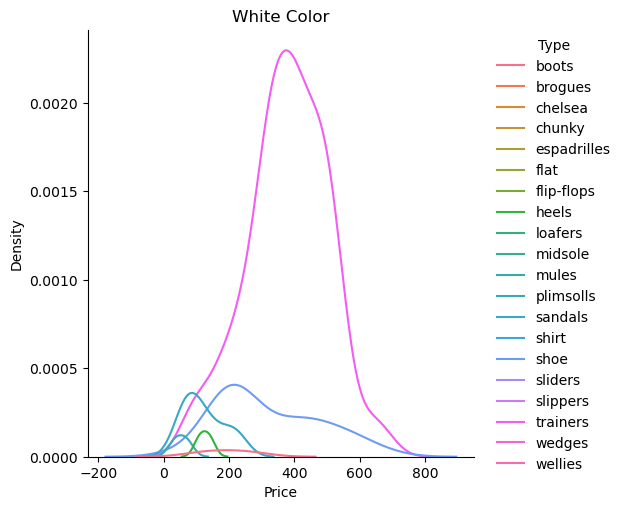

In [41]:
dftemp = MakeDataFrameGroup(df.copy() , "Color" , "white")
sns.displot(dftemp, x="Price", hue="Type", kind="kde", fill=False , warn_singular=False).set(title='White Color')

# Outliiers And Average

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.7+ KB


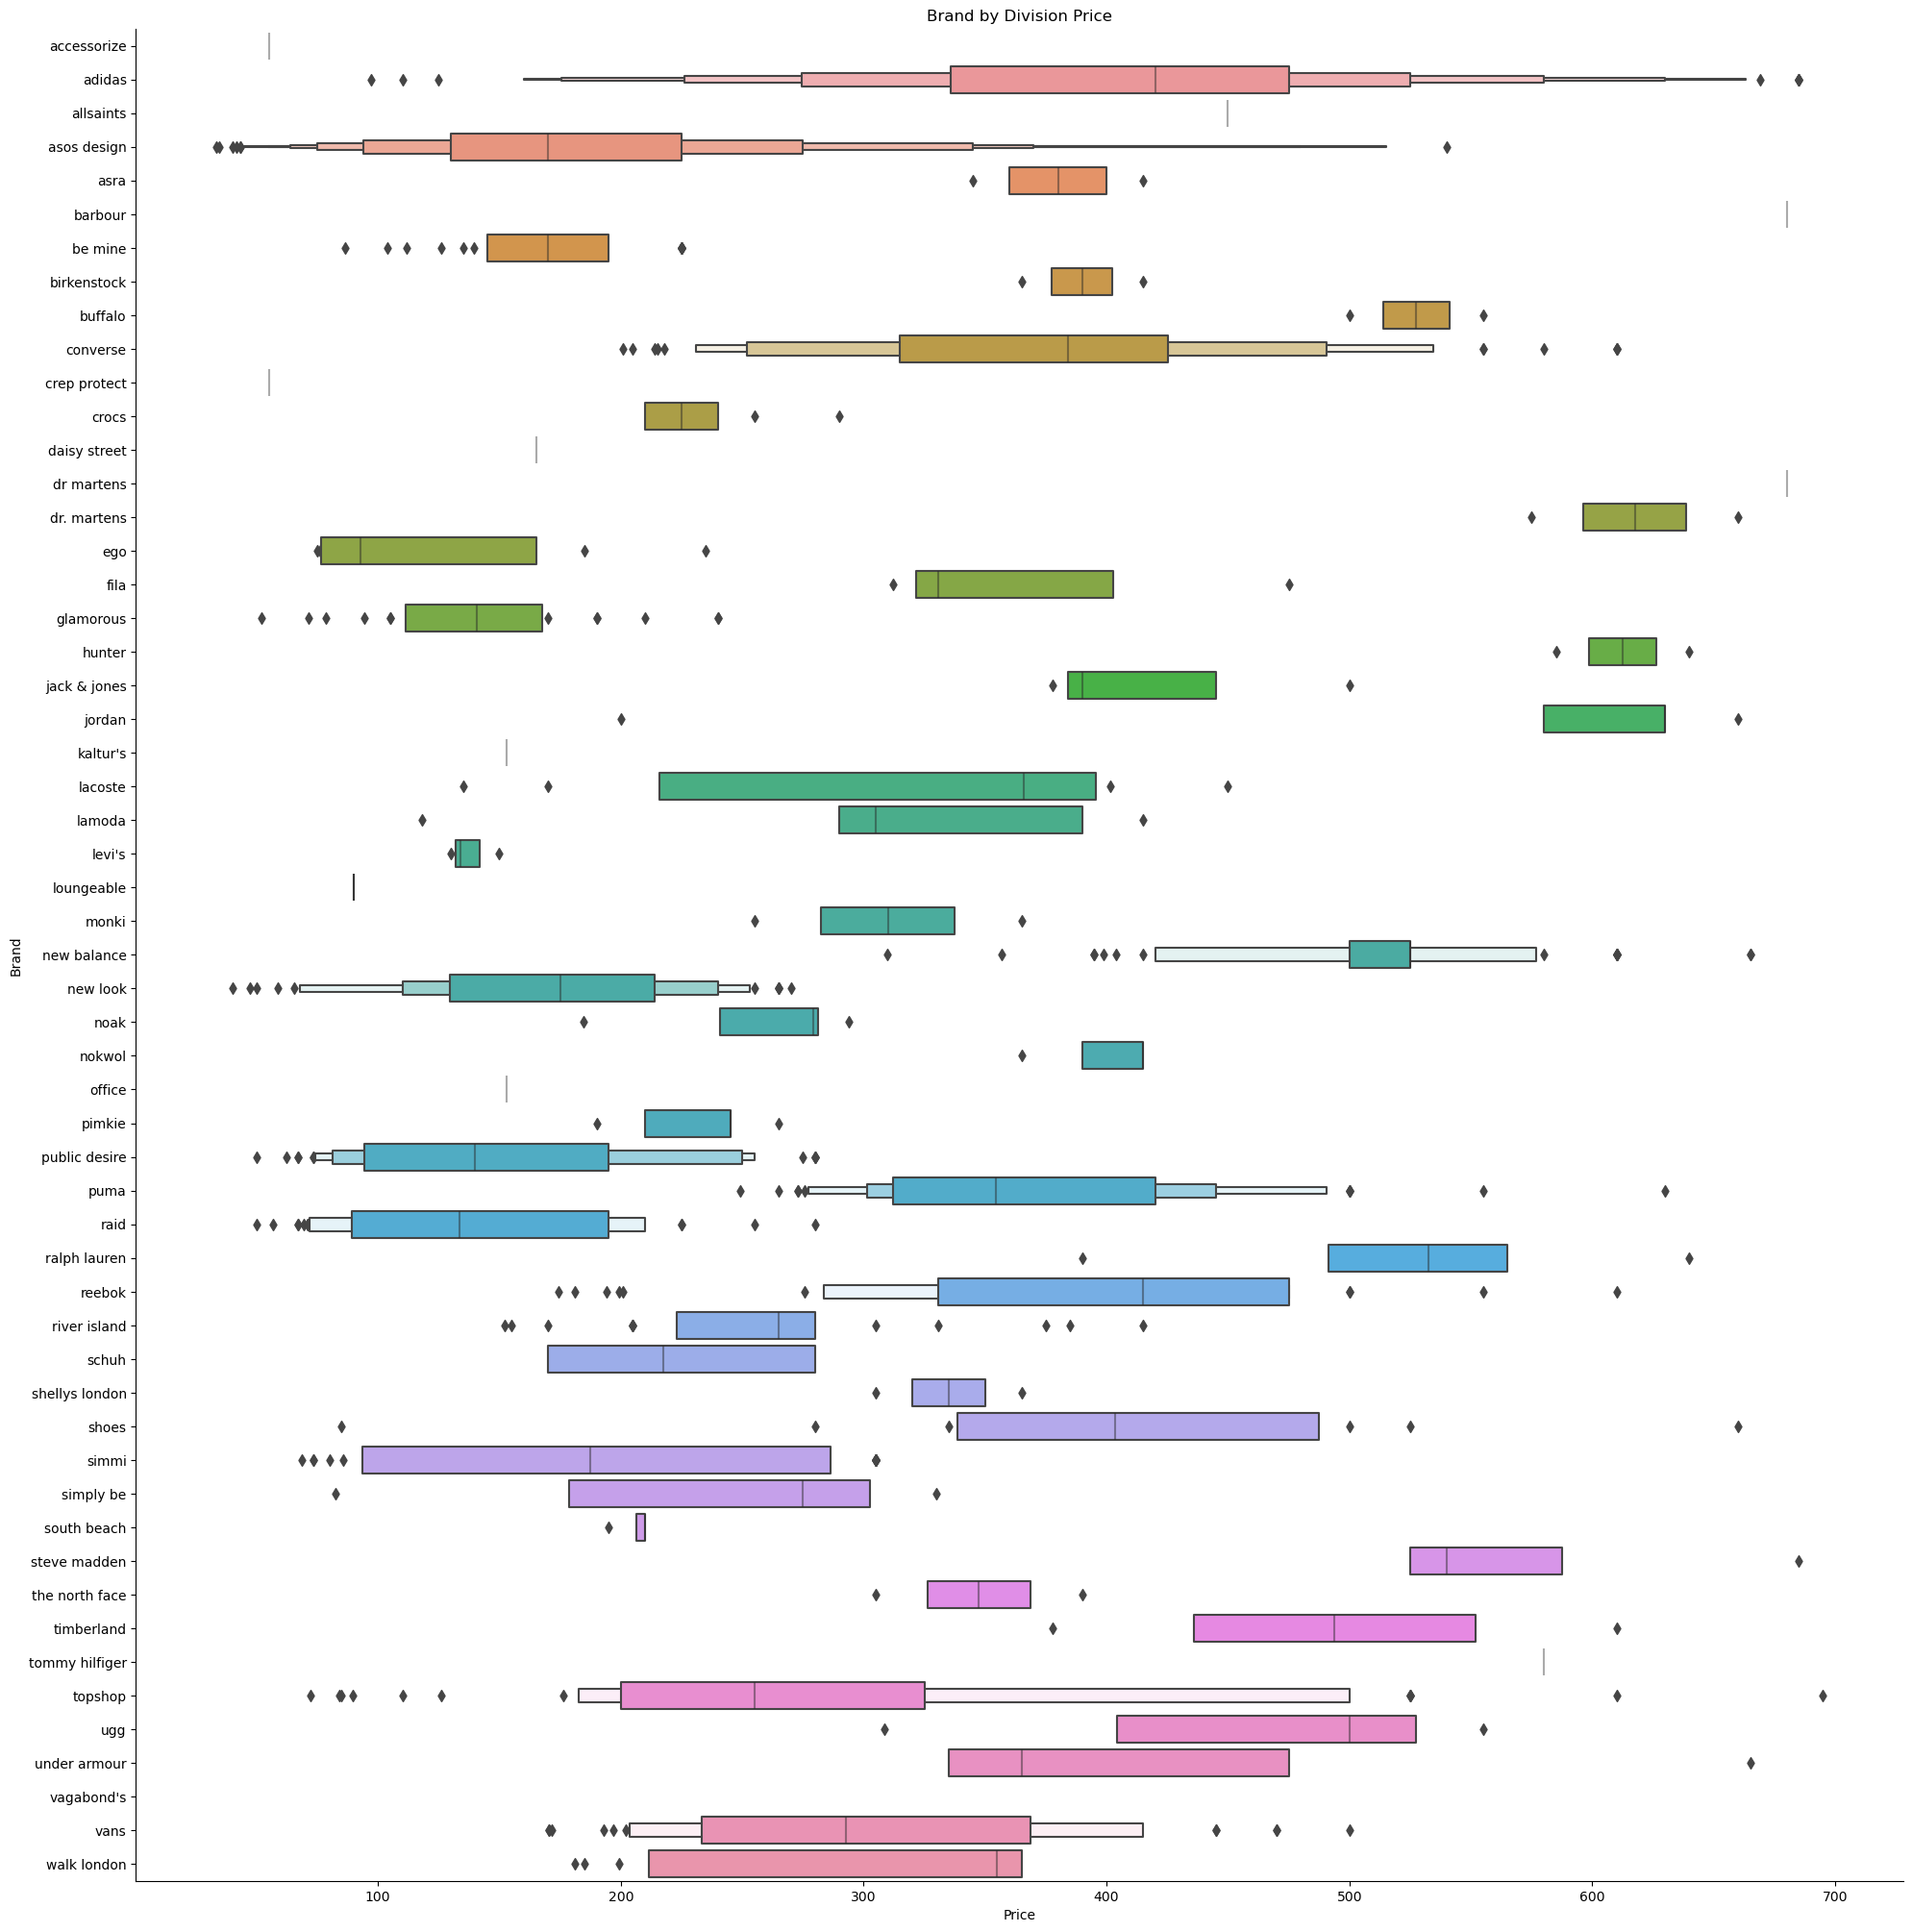

In [43]:
sns.catplot(data=df, x="Price", y="Brand" ,kind="boxen", orient="h", sharex=False, margin_titles=True, height=20, aspect=1,).set(title='Brand by Division Price')

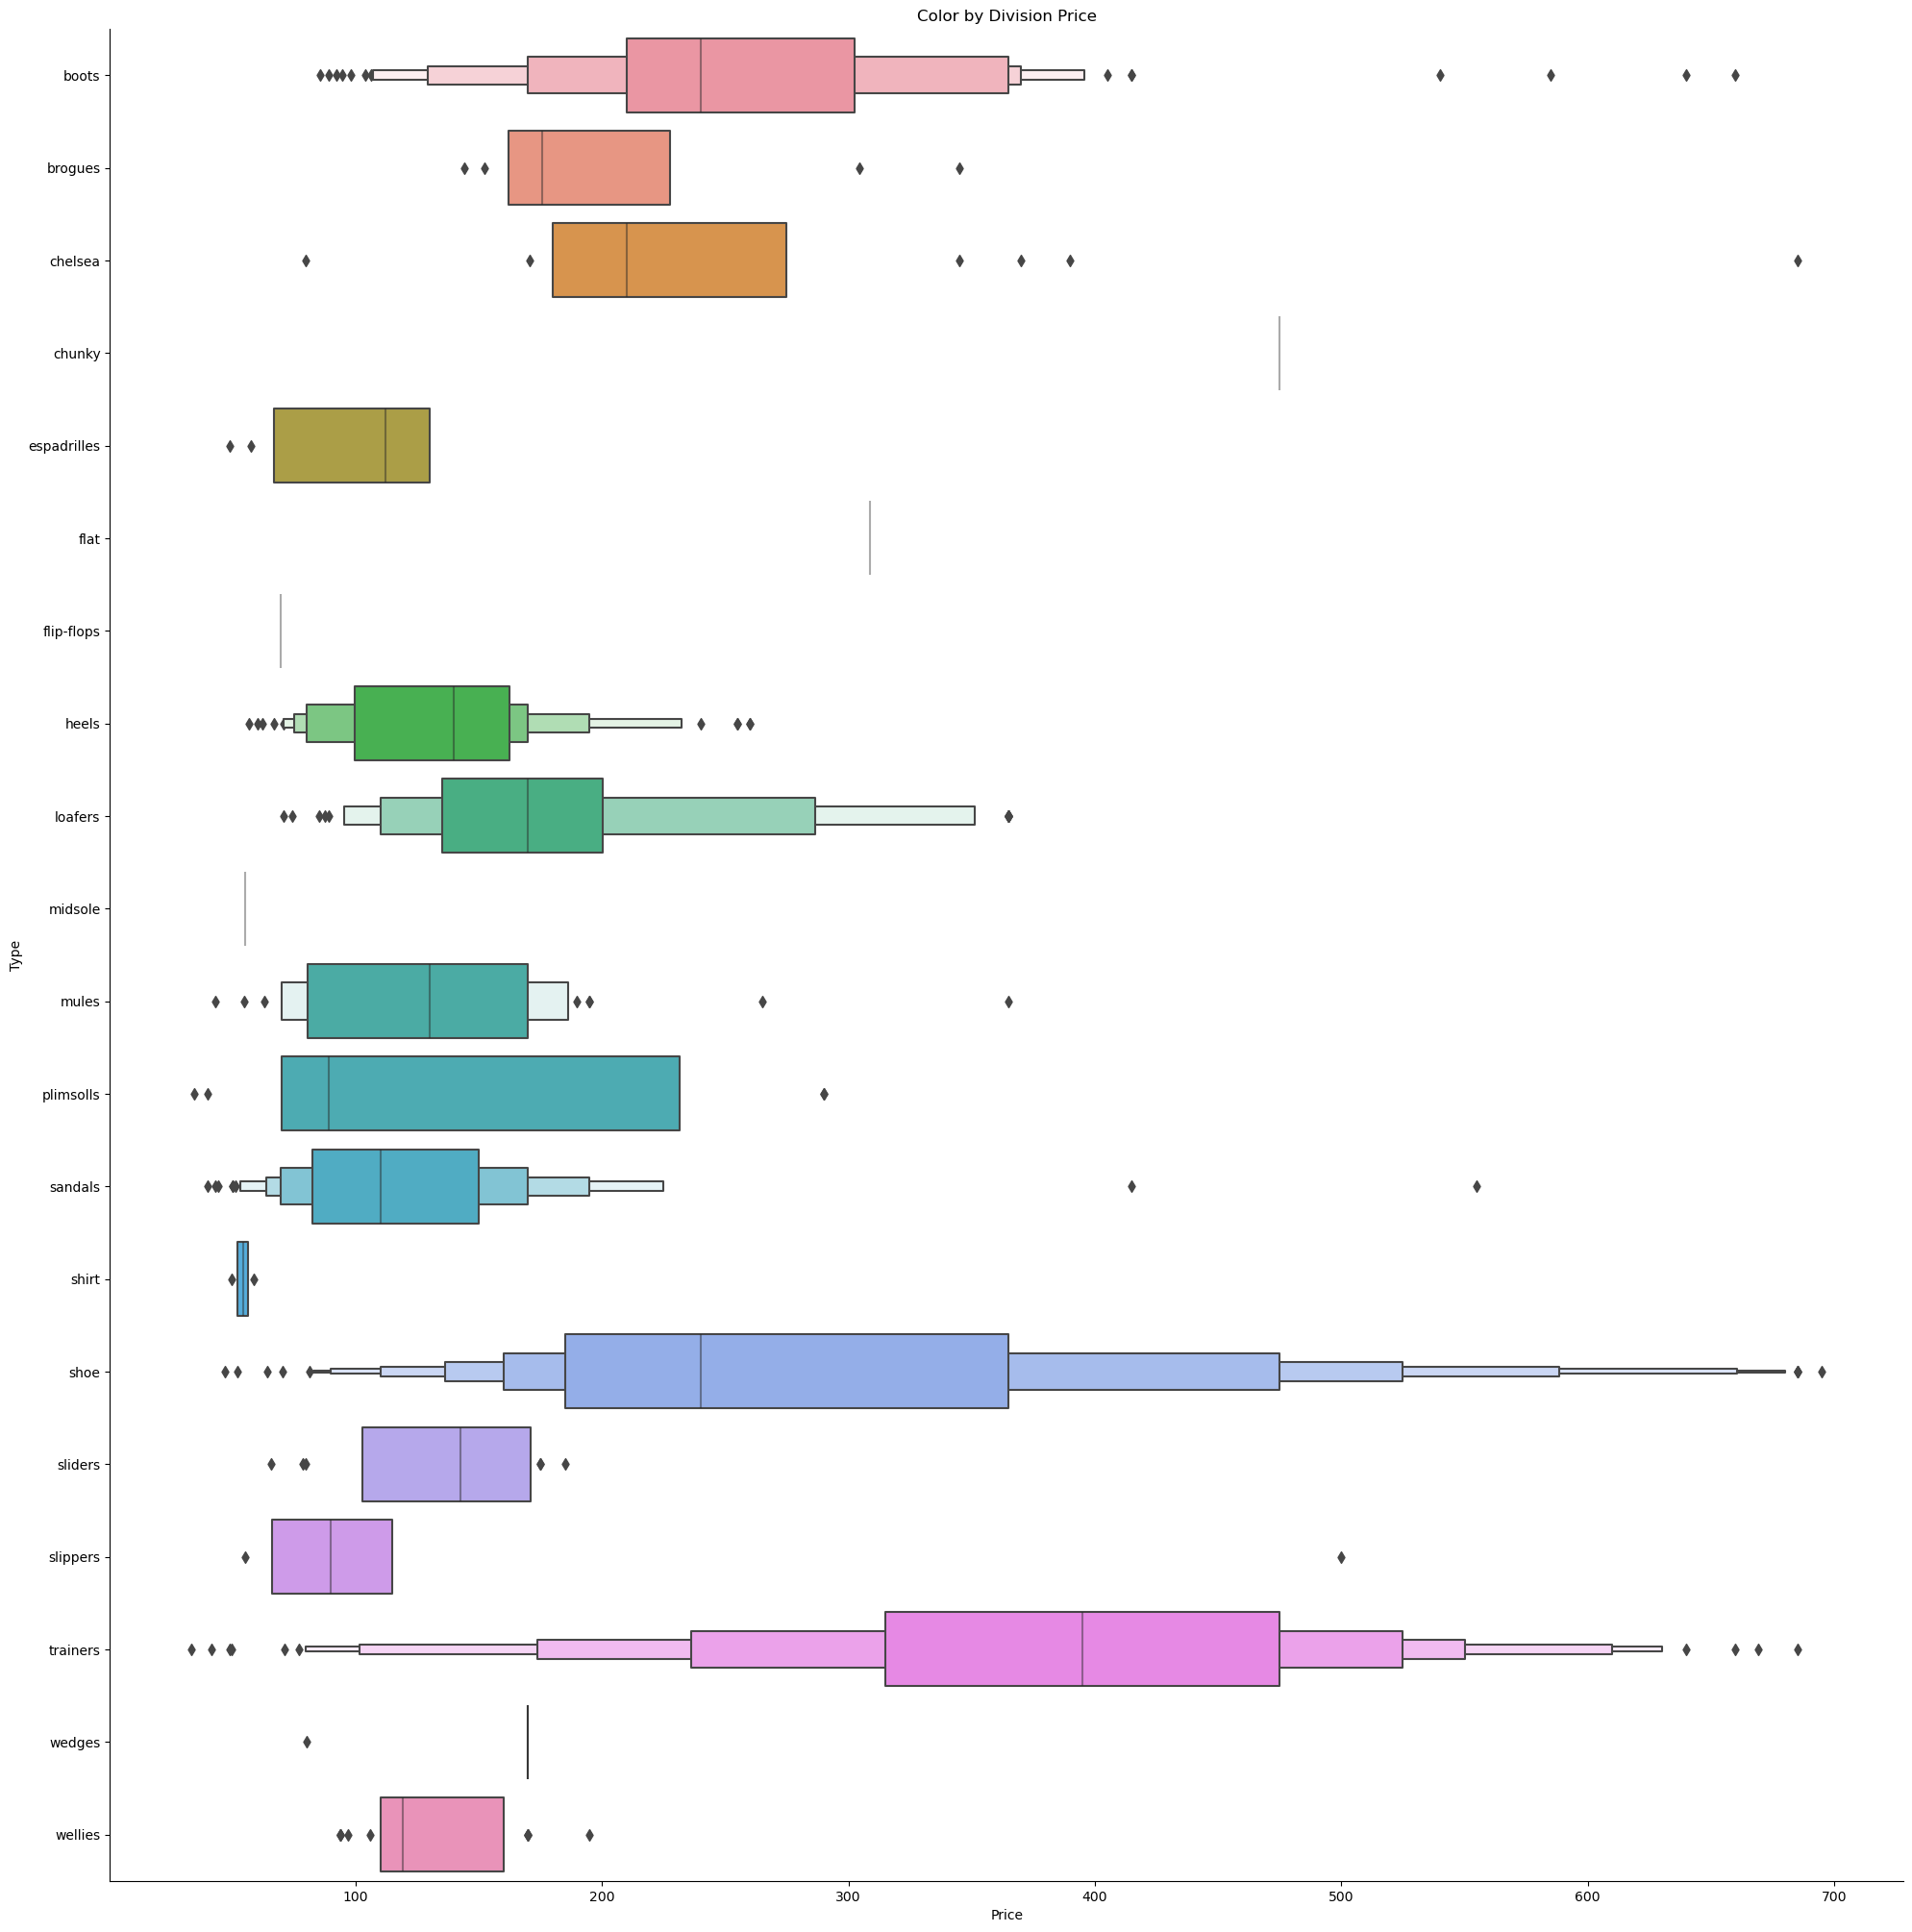

In [44]:
sns.catplot(data=df, x="Price", y="Type" ,kind="boxen", orient="h", sharex=False, margin_titles=True, height=20, aspect=1,).set(title='Color by Division Price')

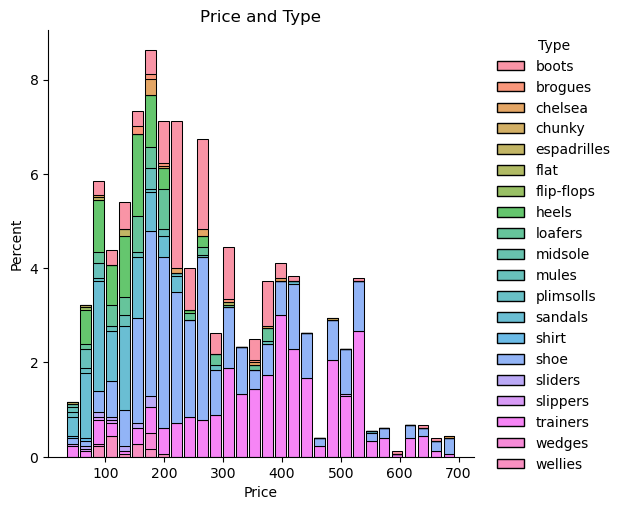

In [45]:
sns.displot(data=df, x="Price", hue="Type", multiple="stack",stat="percent", shrink=0.8 ,bins=30).set(title="Price and Type")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.7+ KB


# Relationship With Price

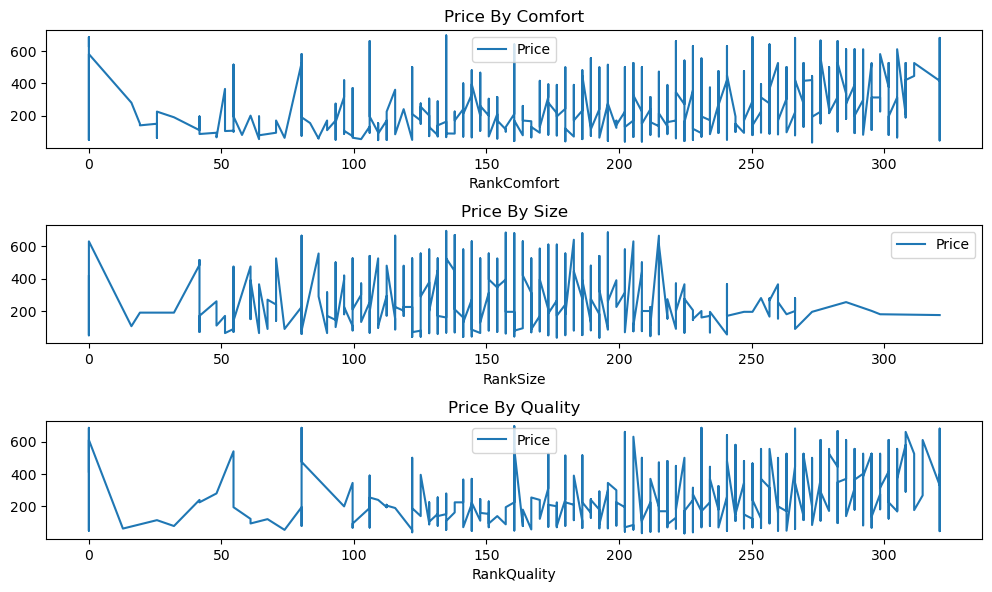

In [47]:
dftemp = df.copy()
fig , axes = plt.subplots(3,1, figsize=(20,6))
dftemp.sort_values(by="RankComfort",ascending=False , inplace=True)
dftemp.plot.line(ax=axes[0],x="RankComfort" , y="Price", title="Price By Comfort",figsize=(10,6))
dftemp.sort_values(by="RankSize",ascending=False , inplace=True)
dftemp.plot.line(ax=axes[1],x="RankSize" , y="Price", title="Price By Size")
dftemp.sort_values(by="RankQuality",ascending=False , inplace=True)
dftemp.plot.line(ax=axes[2],x="RankQuality" , y="Price", title="Price By Quality")
fig.tight_layout(pad=1.0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.7+ KB


# The Influencing Column

In [49]:
def MakeDataFrameByBrandColor(df):
    data1 = {"Brand": [] , "AvgPrice":[]}
    data2 = {"Color": [] , "AvgPrice":[]}
    data3 = {"Type": [] , "AvgPrice":[]}
    data4 = {"Upper": [] , "AvgPrice":[]}
    data5 = {"Sole": [] , "AvgPrice":[]}
    for x in df.Brand.unique():
        df1 = df[df["Brand"] == x]
        data1["Brand"].append(x)
        data1["AvgPrice"].append(df1.Price.mean())
    for x in df.Color.unique():
        df1 = df[df["Color"] == x]
        data2["Color"].append(x)
        data2["AvgPrice"].append(df1.Price.mean())
    for x in df.Type.unique():
        df1 = df[df["Type"] == x]
        data3["Type"].append(x)
        data3["AvgPrice"].append(df1.Price.mean())
    for x in df.Upper.unique():
        df1 = df[df["Upper"] == x]
        data4["Upper"].append(x)
        data4["AvgPrice"].append(df1.Price.mean())
    for x in df.Sole.unique():
        df1 = df[df["Sole"] == x]
        data5["Sole"].append(x)
        data5["AvgPrice"].append(df1.Price.mean())  
    df1 = pd.DataFrame(data1)
    df2 = pd.DataFrame(data2)
    df3 = pd.DataFrame(data3)
    df4 = pd.DataFrame(data4)
    df5 = pd.DataFrame(data5)
    return df1 , df2 , df3 , df4 , df5

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.7+ KB


In [51]:
df1 , df2,df3 ,df4, df5 = MakeDataFrameByBrandColor(df.copy())

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ProductKey     1798 non-null   int64   
 1   Name           1798 non-null   object  
 2   NumberCatalog  1798 non-null   int64   
 3   Gender         1798 non-null   category
 4   Brand          1798 non-null   category
 5   Price          1798 non-null   float64 
 6   Color          1798 non-null   category
 7   Details        1798 non-null   int64   
 8   Sole           1798 non-null   category
 9   Upper          1798 non-null   category
 10  Type           1798 non-null   category
 11  GlobalRank     1798 non-null   category
 12  Reviews        1798 non-null   int64   
 13  RankSize       1798 non-null   float64 
 14  RankComfort    1798 non-null   float64 
 15  RankQuality    1798 non-null   float64 
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 155.7+ KB


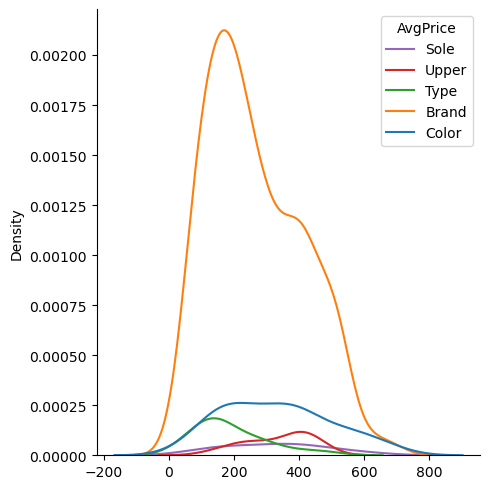

In [53]:
x1 = list(df1["AvgPrice"])
x2 = list(df2["AvgPrice"])
x3 = list(df3["AvgPrice"])
x4 = list(df4["AvgPrice"])
x5 = list(df5["AvgPrice"])
sns.displot([x1 , x2 , x3,x4 ,x5], kind="kde", fill=False, facet_kws={'legend_out': False})
plt.legend(title='AvgPrice', loc='upper right', labels=["Sole", "Upper" , "Type" , 'Brand' ,'Color'])

# Import

In [54]:
from dython.nominal import associations
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
import category_encoders as ce

# The Relationship between Columns

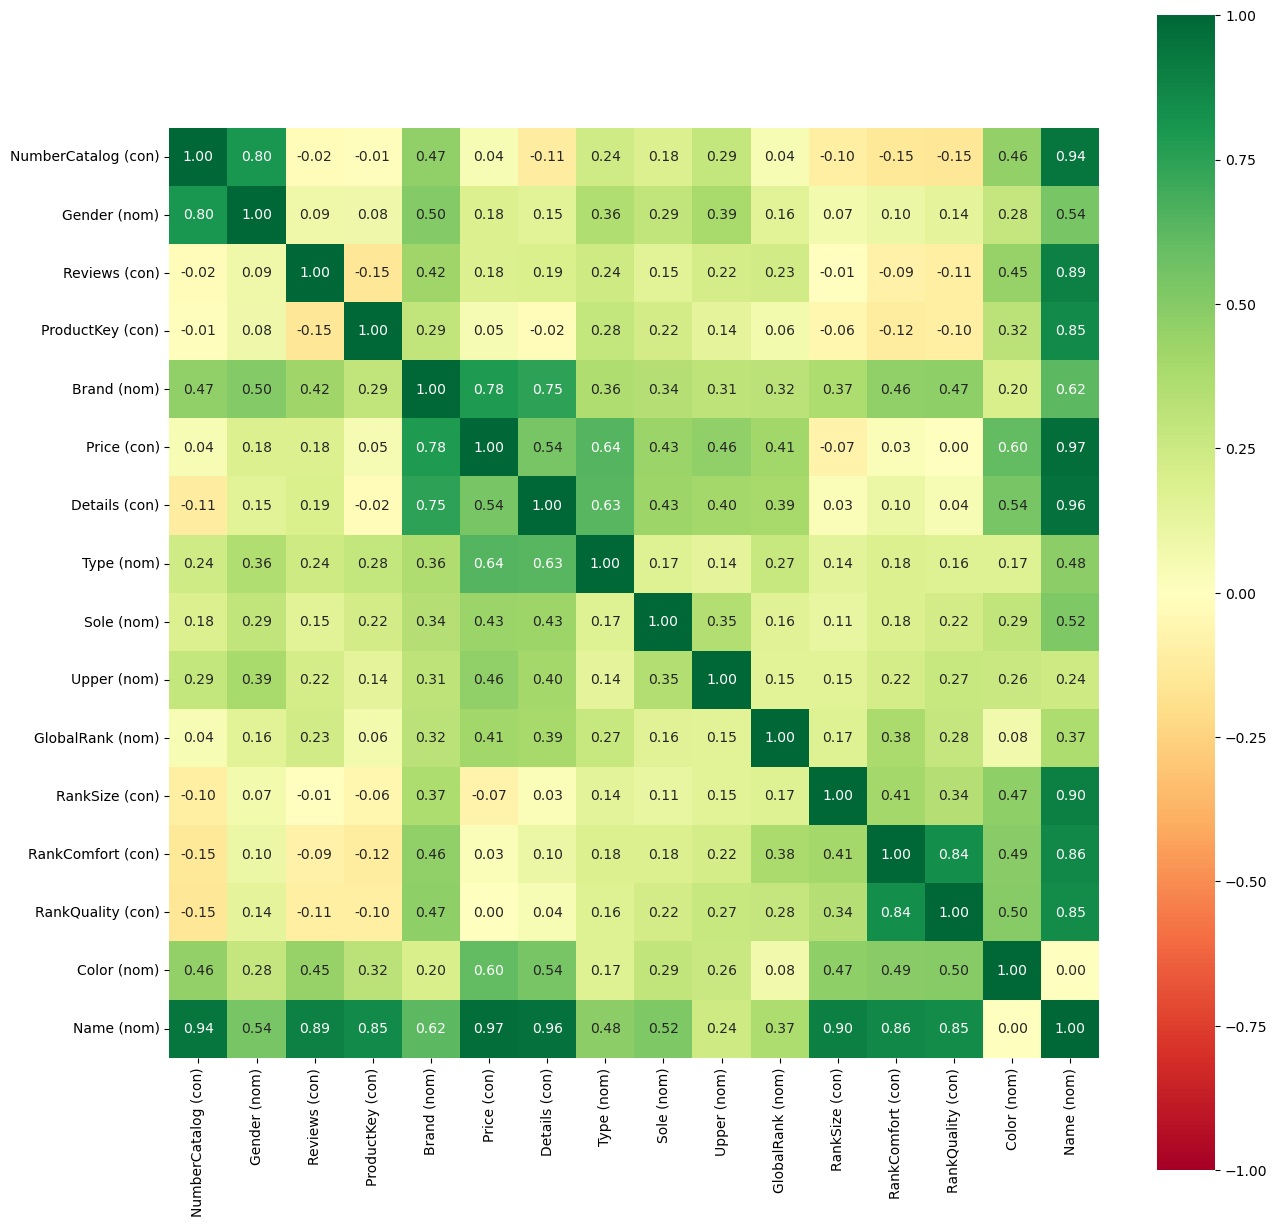

In [55]:
ax = associations(df, figsize = (15, 15), cmap='RdYlGn', mark_columns = True, clustering=True)
plt.show()

# Create Relationship Between Category Colums

In [56]:
def ConvertCategory(df, Column):
    df_Temp = df.copy()
    BestColumn = []
    uniqueColumn = df_Temp[Column].unique()
    for x in uniqueColumn:
        Column_Dic = {"Name": -1 , "Count": -1 , "Price": -1}
        Column_Dic["Name"] = x
        Column_Dic["Count"] = df_Temp[Column].value_counts()[x]
        BestColumn.append(Column_Dic)
    BestColumn = sorted(BestColumn, key=lambda x: x['Count'],reverse=True)
    count=1
    df_Temp = df_Temp.astype({Column:'object'})
    for x in BestColumn:
        for row in range(df.shape[0]):
            if df_Temp.loc[row,Column] == x["Name"]:
                df_Temp.loc[row,Column] = count
        count+=1
    df_Temp = df_Temp.astype({Column:'int64'})
    return df_Temp

In [57]:
df1 = ConvertCategory(df ,"Upper")
df1 = ConvertCategory(df1 ,"Brand")
df1 = ConvertCategory(df1 ,"Color")
df1 = ConvertCategory(df1 ,"Type")

# Method MeachineLearning

In [58]:
from sklearn.model_selection import train_test_split
def MeachineLearning(df,label,features,IsEncoder):

    X = df[features]
    y = df[label]

    df_copy = df.copy()
    #--->Encoder The Category values
    if IsEncoder:
        encoder= ce.BinaryEncoder(cols = features ,return_df = True)
        X = encoder.fit_transform(df_copy[features])
        print("-->Learning By: "+str(features))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    if IsEncoder:
    #--->The Split Table to Train and Tests
        print("\n-->Initial amount of samples: #{}".format(X.shape[0]))
        print("   Number of training samples: #{}".format(X_train.shape[0]))
        print("   Number of test samples: #{}".format(X_test.shape[0]))

    #--->Fit Method
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    return model , X , X_test, y_test

In [59]:
#--->Describe output for model
def DescribeModel(model, X_test, y_test):
    from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score
    print("\n--->Predicting")
    print("\tDisplaying information re:")
    y_pred = model.predict(X_test)
   
    print("\t1. RMAE: ", mean_absolute_error(y_true=y_test, y_pred=y_pred)) #the lower the value the better 
    print("\t2. R^2 : ", r2_score(y_test, y_pred)) # closer to 1 but not 1, the better
        
    coef = list(sorted(zip(np.arange(X_test.shape[1]), abs(model.coef_)),key=lambda x: x[1]))
    coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
    print('\nCoefficient for every feature:\n')
    print(coef_table)

In [60]:
model , X  , X_test, y_test= MeachineLearning(df1 ,label = 'Price',features = ["Brand"] , IsEncoder=False)
model1  , X1 , X_test1, y_test1 = MeachineLearning(df1 ,label = 'Price',features = ["Type"] , IsEncoder=False)
model2  , X2  , X_test2, y_test2 = MeachineLearning(df1 ,label = 'Price',features = ["Details"] , IsEncoder=False)
model3  , X3  , X_test3 , y_test3 = MeachineLearning(df1 ,label = 'Price',features = ["Color"] , IsEncoder=False)

# EDA MeachineLearning

C:\Users\danie\AppData\Local\Temp\ipykernel_2132\3030357243.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X ,model.predict(X), 'k' , color="black" , linewidth=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2132\3030357243.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X1 ,model1.predict(X1), 'k' , color="black" , linewidth=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2132\3030357243.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(X2 ,model2.predict(X2), 'k' , color="black" , linewidth=1)
C:\Users\danie\AppData\Local\Temp\ipykernel_2132\3030357243.py:8: UserWarning: col

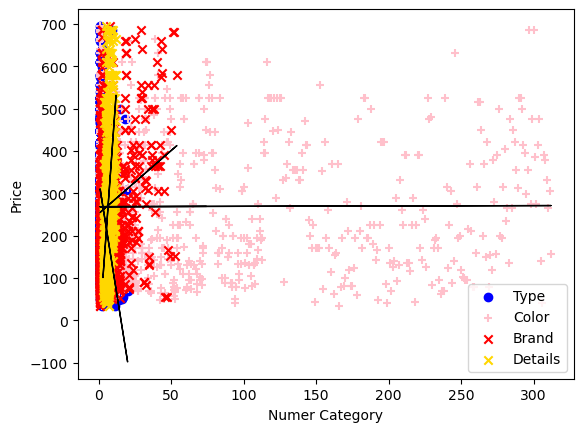

In [61]:
plt.scatter(x=df1["Type"] ,y=df1["Price"] , c='b' , marker='o' ,label='Type')
plt.scatter(x=df1["Color"] ,y=df1["Price"] , c='pink' , marker='+' ,label='Color')
plt.scatter(x=df1["Brand"] ,y=df1["Price"] , c='r' , marker='x' ,label='Brand')
plt.scatter(x=df1["Details"] ,y=df1["Price"] , c='gold' , marker='x' ,label='Details')
plt.plot(X ,model.predict(X), 'k' , color="black" , linewidth=1)
plt.plot(X1 ,model1.predict(X1), 'k' , color="black" , linewidth=1)
plt.plot(X2 ,model2.predict(X2), 'k' , color="black" , linewidth=1)
plt.plot(X3 ,model3.predict(X3), 'k' , color="black" , linewidth=1)
plt.legend(numpoints=1 , loc=4)
plt.xlabel("Numer Category")
plt.ylabel("Price")
plt.show()

# Option I

In [62]:
modelTop  , XTop  , X_testTop, y_testTop = MeachineLearning(df ,label = 'Price',features = ["Brand","Details","Type","Color"],IsEncoder=True)
DescribeModel(modelTop ,X_testTop, y_testTop)

-->Learning By: ['Brand', 'Details', 'Type', 'Color']

-->Initial amount of samples: #1798
   Number of training samples: #1438
   Number of test samples: #360

--->Predicting
	Displaying information re:
	1. RMAE:  71.77075574812606
	2. R^2 :  0.5655413627424822

Coefficient for every feature:

    Attributes  Coefficient
0          4.0     0.619075
1          3.0     1.645049
2         20.0     4.496201
3          9.0     4.515161
4         22.0     5.658222
5         17.0     7.214832
6         16.0     7.552423
7         23.0     9.492519
8         18.0    10.913071
9         19.0    12.802053
10        21.0    14.395511
11        13.0    17.712279
12        14.0    21.468037
13         7.0    26.193511
14        11.0    28.098847
15        15.0    37.612945
16         8.0    43.589101
17         5.0    48.331570
18         6.0    78.250025
19         1.0    79.260277
20        12.0   104.262751
21        10.0   104.862977
22         0.0   107.396946
23         2.0   124.497963


# Option II

In [63]:
modelTop1  , XTop1  , X_testTop1, y_testTop1 = MeachineLearning(df ,label = 'Price',features = ["Brand", "Color", "Details","Gender","GlobalRank","Reviews","Type","Upper","Sole"],IsEncoder=True)
DescribeModel(modelTop1 ,X_testTop1, y_testTop1)

-->Learning By: ['Brand', 'Color', 'Details', 'Gender', 'GlobalRank', 'Reviews', 'Type', 'Upper', 'Sole']

-->Initial amount of samples: #1798
   Number of training samples: #1438
   Number of test samples: #360

--->Predicting
	Displaying information re:
	1. RMAE:  70.57416666666666
	2. R^2 :  0.5930901739053244

Coefficient for every feature:

    Attributes   Coefficient
0          4.0  6.830633e-02
1         28.0  2.401630e-01
2         25.0  3.476316e-01
3         26.0  5.893146e-01
4         31.0  9.265182e-01
5          3.0  2.306351e+00
6         27.0  2.405166e+00
7         30.0  2.658032e+00
8         13.0  3.225655e+00
9          7.0  3.365493e+00
10        18.0  3.903171e+00
11        11.0  7.901263e+00
12        44.0  8.097637e+00
13        24.0  8.227618e+00
14         8.0  8.340247e+00
15        12.0  1.008186e+01
16        29.0  1.011772e+01
17        22.0  1.061702e+01
18         9.0  1.081196e+01
19        14.0  1.098312e+01
20        10.0  1.252476e+01
21        35.0